
# PORT-CITY SIMULATION DATA - EXPERIMENTS

## Import Dependencies & Pickle Files





In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_auc_score

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import importlib.util

# Path to your script
module_path = '/content/drive/MyDrive/TESE/src/febagni_scripts.py'

# Load the module
spec = importlib.util.spec_from_file_location("febagni_scripts", module_path)
febagni_scripts = importlib.util.module_from_spec(spec)
spec.loader.exec_module(febagni_scripts)
# Now you can use functions from the script
# Example: if your script has a function named 'my_function'
# febagni_scripts.my_function()


In [5]:
path_directory = '/content/drive/MyDrive/TESE/data/preprocessed/'

path_case1_s0_uniform1 = path_directory + "data_case1_s0_uniform1.pkl"
path_case1_s1_uniform1 = path_directory + "data_case1_s1_uniform1.pkl"
path_case1_s0_uniform2 = path_directory + "data_case1_s0_uniform2.pkl"
path_case1_s1_uniform2 = path_directory + "data_case1_s1_uniform2.pkl"

path_case2_s0_uniform1 = path_directory + "data_case2_s0_uniform1.pkl"
path_case2_s1_uniform1 = path_directory + "data_case2_s1_uniform1.pkl"
path_case2_s0_uniform2 = path_directory + "data_case2_s0_uniform2.pkl"
path_case2_s1_uniform2 = path_directory + "data_case2_s1_uniform2.pkl"

path_case3_s0_uniform1 = path_directory + "data_case3_s0_uniform1.pkl"
path_case3_s1_uniform1 = path_directory + "data_case3_s1_uniform1.pkl"
path_case3_s0_uniform2 = path_directory + "data_case3_s0_uniform2.pkl"
path_case3_s1_uniform2 = path_directory + "data_case3_s1_uniform2.pkl"

path_case1_s0_gaussian = path_directory + "data_case1_s0_gaussian.pkl"
path_case1_s1_gaussian = path_directory + "data_case1_s1_gaussian.pkl"
path_case2_s0_gaussian = path_directory + "data_case2_s0_gaussian.pkl"
path_case2_s1_gaussian = path_directory + "data_case2_s1_gaussian.pkl"
path_case3_s0_gaussian = path_directory + "data_case3_s0_gaussian.pkl"
path_case3_s1_gaussian = path_directory + "data_case3_s1_gaussian.pkl"


def import_pickle(path):
  if os.path.exists(path):
    with open(path, 'rb') as f:
      print("Pickle file imported from: ", path)
      return pickle.load(f)
  else:
    print("File not found.")

data_case1_s0_uniform1 = import_pickle(path_case1_s0_uniform1)
data_case1_s1_uniform1 = import_pickle(path_case1_s1_uniform1)
data_case1_s0_uniform2 = import_pickle(path_case1_s0_uniform2)
data_case1_s1_uniform2 = import_pickle(path_case1_s1_uniform2)

data_case2_s0_uniform1 = import_pickle(path_case2_s0_uniform1)
data_case2_s1_uniform1 = import_pickle(path_case2_s1_uniform1)
data_case2_s0_uniform2 = import_pickle(path_case2_s0_uniform2)
data_case2_s1_uniform2 = import_pickle(path_case2_s1_uniform2)

data_case3_s0_uniform1 = import_pickle(path_case3_s0_uniform1)
data_case3_s1_uniform1 = import_pickle(path_case3_s1_uniform1)
data_case3_s0_uniform2 = import_pickle(path_case3_s0_uniform2)
data_case3_s1_uniform2 = import_pickle(path_case3_s1_uniform2)

data_case1_s0_gaussian = import_pickle(path_case1_s0_gaussian)
data_case1_s1_gaussian = import_pickle(path_case1_s1_gaussian)
data_case2_s0_gaussian = import_pickle(path_case2_s0_gaussian)
data_case2_s1_gaussian = import_pickle(path_case2_s1_gaussian)
data_case3_s0_gaussian = import_pickle(path_case3_s0_gaussian)
data_case3_s1_gaussian = import_pickle(path_case3_s1_gaussian)

Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case1_s0_uniform1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case1_s1_uniform1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case1_s0_uniform2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case1_s1_uniform2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case2_s0_uniform1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case2_s1_uniform1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case2_s0_uniform2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case2_s1_uniform2.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case3_s0_uniform1.pkl
Pickle file imported from:  /content/drive/MyDrive/TESE/data/preprocessed/data_case3_s1_uni

In [6]:
data_case1_s0_uniform1.shape

(21, 14400)

In [7]:
def generate_scores(dataset1, dataset2=None, B=32, M=1000):

    p_values = []
    for _ in range(M):
        # Generate batches
        if dataset2 is not None:
            batch1, batch2 = febagni_scripts.get_batches(B, dataset1, dataset2)
        else:
            batch1, batch2 = febagni_scripts.get_batches(B, dataset1)

        # Perform Hotelling's T² test
        result = febagni_scripts.hotelling_t2_test(batch1, batch2)

        p_values.append(result["p_value"])

    return p_values

In [8]:
def auc_scores(scenario0, scenario1, batch_sizes, M=10000):
  results = []
  for batch_size in batch_sizes:
    s0_scores = generate_scores(scenario0, B=batch_size, M=M)
    s1_scores = generate_scores(scenario1, B=batch_size, M=M)
    s0_s1_scores = generate_scores(scenario0, scenario1, B=batch_size, M=M)
    s0_true = np.ones(len(s0_scores))
    s1_true = np.ones(len(s1_scores))
    s0_s1_true = np.zeros(len(s0_s1_scores))
    roc_auc = roc_auc_score(np.concatenate((s0_true, s0_s1_true)), np.concatenate((s0_scores, s0_s1_scores)))
    print(f"Batch Size: {batch_size}, AUC: {roc_auc}")
    results.append({'batch_size': batch_size, 'AUC': roc_auc})
  df_results = pd.DataFrame(results)
  return df_results

In [9]:
def combine_aucs(auc_up, auc_down, auc_lungomare, auc_francia, auc_total):
  # Create a list of DataFrames
  dfs = [auc_up, auc_down, auc_lungomare, auc_francia, auc_total]

  # Add a column to identify the source of each DataFrame
  for i, df in enumerate(dfs):
      df['segment'] = ['up'] * len(df) if i==0 else (['down'] * len(df) if i==1 else (['lungomare'] * len(df) if i==2 else (['francia'] * len(df) if i ==3 else (['total'] * len(df)))))

  # Concatenate the DataFrames
  combined_df = pd.concat(dfs, ignore_index=True)

  # Print the combined DataFrame
  return combined_df

In [10]:
def plot_auc_vs_batch_size(combined_df):
    """
    Plots AUC vs batch size for different segments.

    Args:
        df: DataFrame with columns 'batch_size', 'AUC', and 'segment'.
        segment_names: List of segment names.
    """
    plt.figure(figsize=(10, 6))

    for segment in combined_df['segment'].unique():
        segment_df = combined_df[combined_df['segment'] == segment]
        plt.plot(segment_df['batch_size'], segment_df['AUC'], label=segment)

    plt.xlabel("Batch Size")
    plt.ylabel("AUC Score")
    plt.title("AUC Score vs. Batch Size for Different Segments")
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def fpr_experiments(scenario, batch_sizes, M=10000, alpha=0.05):
  results = []
  for batch_size in batch_sizes:
    for alpha in alphas:
      fpr, _ = febagni_scripts.fpr_tpr_calculation(scenario, B=batch_size, M=M, alpha=alpha)
      print(f"Batch Size: {batch_size}, Alpha: {alpha}, FPR: {fpr}")
      results.append({'batch_size': batch_size, 'alpha': alpha, 'fpr': fpr})
  df_results = pd.DataFrame(results)
  return df_results

In [12]:
def plot_fpr_vs_alpha(df):
    """
    Plots FPR vs alpha for different batch sizes.

    Args:
        df: DataFrame with columns 'batch_size', 'alpha', and 'fpr'.
    """
    plt.figure(figsize=(10, 6))

    for batch_size in df['batch_size'].unique():
        batch_df = df[df['batch_size'] == batch_size]
        plt.plot(batch_df['alpha'], batch_df['fpr'], label=f"Batch Size = {batch_size}", marker='o')

    plt.axline((0, 0), slope=1, color='gray', linestyle='--', label="y = x (reference)")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Alpha (log scale)")
    plt.ylabel("FPR (log scale)")
    plt.title("FPR vs. Alpha for Different Batch Sizes")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [13]:
def compute_average_fpr(scenario0, scenario1):
    """
    Computes the average FPR from two dataframes.

    Args:
        scenario0: DataFrame with 'batch_size', 'alpha', and 'fpr' columns.
        scenario1: DataFrame with 'batch_size', 'alpha', and 'fpr' columns.

    Returns:
        DataFrame with 'batch_size', 'alpha', and 'fpr' (average) columns.
    """
    # Merge the two dataframes
    merged_df = pd.merge(scenario0, scenario1, on=['batch_size', 'alpha'], suffixes=('_s0', '_s1'))

    # Compute average FPR
    merged_df['fpr'] = (merged_df['fpr_s0'] + merged_df['fpr_s1']) / 2

    # Select the desired columns
    result_df = merged_df[['batch_size', 'alpha', 'fpr']]
    return result_df

In [14]:
def get_averaged_fpr_df(scenario0, scenario1):
  fpr_scenario0 = fpr_experiments(scenario0, batch_sizes, M, alphas)
  fpr_scenario1 = fpr_experiments(scenario1, batch_sizes, M, alphas)
  fpr_average = compute_average_fpr(fpr_scenario0, fpr_scenario1)
  return fpr_average

In [19]:
batch_sizes = [16, 32, 64, 128]
M = 10000
alphas = [0.1, 0.05, 0.01, 0.005, 0.001]

## Prepare multimodal

In [ ]:
multimodal_data_s0 = febagni_scripts.create_multimodal_dataset(data_case1_s0_uniform1, data_case1_s0_uniform2)
multimodal_data_s0.shape

(21, 14400)

In [ ]:
multimodal_data_s1 = febagni_scripts.create_multimodal_dataset(data_case1_s1_uniform1, data_case1_s1_uniform2)
multimodal_data_s1.shape

(21, 14400)

In [ ]:
num_variables, num_samples = data_case1_s0_uniform1.shape
# Generate sanity check data
np.random.seed(42)  # For reproducibility
sanity_check_data = np.random.normal(0, 1, (num_variables, num_samples))

print("Sanity Check Data Shape:", sanity_check_data.shape)

Sanity Check Data Shape: (21, 14400)


# EXPERIMENTS

In [ ]:
np.random.seed(42)
low_auc_s0 = np.random.rand(M)
low_auc_s1 = np.random.rand(M)

high_auc_s0 = np.zeros(M)
high_auc_s1 = np.ones(M)


def auc_scores_sanity_check(scenario0, scenario1, batch_sizes, M=10000):
    results = []
    for batch_size in batch_sizes:

        s0_scores = scenario0
        s1_scores = scenario1

        s0_true = np.zeros(len(s0_scores))
        s1_true = np.ones(len(s1_scores))

        try:
          roc_auc = roc_auc_score(np.concatenate((s0_true, s1_true)), np.concatenate((s0_scores, s1_scores)))
          print(f"Batch Size: {batch_size}, AUC: {roc_auc}")
          results.append({'batch_size': batch_size, 'AUC': roc_auc})
        except ValueError as e:
          print(f"Error calculating AUC for batch size {batch_size}: {e}")
          results.append({'batch_size': batch_size, 'AUC': np.nan})

    df_results = pd.DataFrame(results)
    return df_results

# Test with low AUC data
low_auc_df = auc_scores_sanity_check(low_auc_s0, low_auc_s1, batch_sizes, M)

# Test with high AUC data
high_auc_df = auc_scores_sanity_check(high_auc_s0, high_auc_s1, batch_sizes, M)

Batch Size: 16, AUC: 0.5103709099999999
Batch Size: 32, AUC: 0.5103709099999999
Batch Size: 64, AUC: 0.5103709099999999
Batch Size: 128, AUC: 0.5103709099999999
Batch Size: 16, AUC: 1.0
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


In [ ]:
print("\nLow AUC Results:")
print(low_auc_df)

print("\nHigh AUC Results:")
print(high_auc_df)


Low AUC Results:
   batch_size       AUC
0          16  0.510371
1          32  0.510371
2          64  0.510371
3         128  0.510371

High AUC Results:
   batch_size  AUC
0          16  1.0
1          32  1.0
2          64  1.0
3         128  1.0


In [ ]:
up_s0 = febagni_scripts.get_segment_data(multimodal_data_s0, "Elicoidale Upstream")
up_s1 = febagni_scripts.get_segment_data(multimodal_data_s1, "Elicoidale Upstream")
auc_up = auc_scores(up_s0, up_s1, batch_sizes, M)

Batch Size: 16, AUC: 0.52274306
Batch Size: 32, AUC: 0.5472201800000001
Batch Size: 64, AUC: 0.58331337
Batch Size: 128, AUC: 0.6582180799999999


In [ ]:
down_s0 = febagni_scripts.get_segment_data(multimodal_data_s0, "Elicoidale Downstream")
down_s1 = febagni_scripts.get_segment_data(multimodal_data_s1, "Elicoidale Downstream")
auc_down = auc_scores(down_s0, down_s1, batch_sizes, M)

Batch Size: 16, AUC: 0.95102119
Batch Size: 32, AUC: 0.9973708699999998
Batch Size: 64, AUC: 0.99999556
Batch Size: 128, AUC: 1.0


In [ ]:
lungomare_s0 = febagni_scripts.get_segment_data(multimodal_data_s0, "Lungomare Canepa")
lungomare_s1 = febagni_scripts.get_segment_data(multimodal_data_s1, "Lungomare Canepa")
auc_lungomare = auc_scores(lungomare_s0, lungomare_s1, batch_sizes, M)

Batch Size: 16, AUC: 0.9987716000000001
Batch Size: 32, AUC: 0.99999827
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


In [ ]:
francia_s0 = febagni_scripts.get_segment_data(multimodal_data_s0, "Via di Francia")
francia_s1 = febagni_scripts.get_segment_data(multimodal_data_s1, "Via di Francia")
auc_francia = auc_scores(francia_s0, francia_s1, batch_sizes, M)

Batch Size: 16, AUC: 0.9979759200000001
Batch Size: 32, AUC: 0.99999718
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


In [ ]:
auc_total = auc_scores(multimodal_data_s0, multimodal_data_s1, batch_sizes, M)

Batch Size: 16, AUC: 0.95266326
Batch Size: 32, AUC: 0.99998316
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


In [ ]:
# Create a list of DataFrames
dfs = [auc_up, auc_down, auc_lungomare, auc_francia, auc_total]

# Add a column to identify the source of each DataFrame
for i, df in enumerate(dfs):
    df['segment'] = ['up'] * len(df) if i==0 else (['down'] * len(df) if i==1 else (['lungomare'] * len(df) if i==2 else (['francia'] * len(df) if i ==3 else (['total'] * len(df)))))

# Concatenate the DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Print the combined DataFrame
combined_df

,batch_size,AUC,segment
0,16,0.522743,up
1,32,0.547220,up
2,64,0.583313,up
3,128,0.658218,up
4,16,0.951021,down
5,32,0.997371,down
6,64,0.999996,down
7,128,1.000000,down
8,16,0.998772,lungomare
9,32,0.999998,lungomare


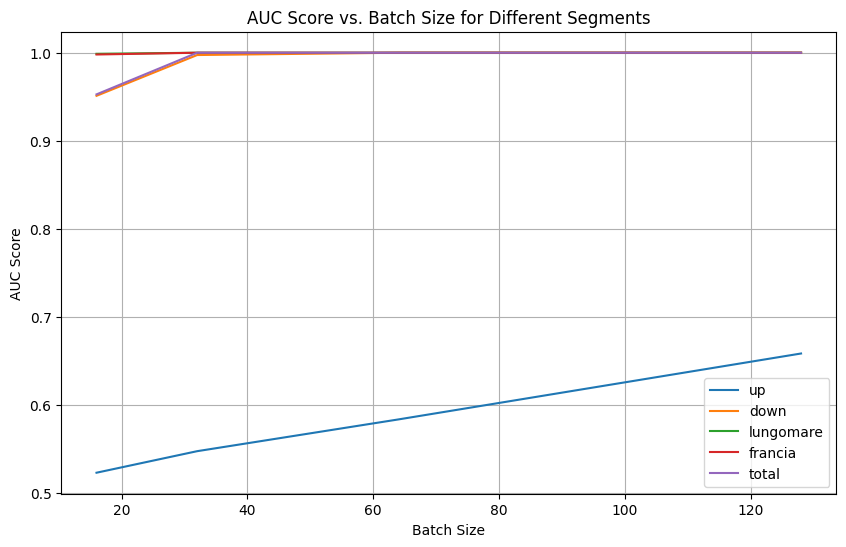

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'combined_df' is already defined as in the provided code

plt.figure(figsize=(10, 6))

for segment in combined_df['segment'].unique():
    segment_df = combined_df[combined_df['segment'] == segment]
    plt.plot(segment_df['batch_size'], segment_df['AUC'], label=segment)

plt.xlabel("Batch Size")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. Batch Size for Different Segments")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fpr_sanity_check = fpr_experiments(sanity_check_data, batch_sizes, M, alphas)
fpr_sanity_check

Batch Size: 16, Alpha: 0.1, FPR: 0.0989
Batch Size: 16, Alpha: 0.05, FPR: 0.0489
Batch Size: 16, Alpha: 0.01, FPR: 0.0107
Batch Size: 16, Alpha: 0.005, FPR: 0.0051
Batch Size: 16, Alpha: 0.001, FPR: 0.0011
Batch Size: 32, Alpha: 0.1, FPR: 0.0996
Batch Size: 32, Alpha: 0.05, FPR: 0.0474
Batch Size: 32, Alpha: 0.01, FPR: 0.0087
Batch Size: 32, Alpha: 0.005, FPR: 0.0057
Batch Size: 32, Alpha: 0.001, FPR: 0.0013
Batch Size: 64, Alpha: 0.1, FPR: 0.1014
Batch Size: 64, Alpha: 0.05, FPR: 0.0483
Batch Size: 64, Alpha: 0.01, FPR: 0.0087
Batch Size: 64, Alpha: 0.005, FPR: 0.0046
Batch Size: 64, Alpha: 0.001, FPR: 0.0008
Batch Size: 128, Alpha: 0.1, FPR: 0.0975
Batch Size: 128, Alpha: 0.05, FPR: 0.0454
Batch Size: 128, Alpha: 0.01, FPR: 0.0099
Batch Size: 128, Alpha: 0.005, FPR: 0.0057
Batch Size: 128, Alpha: 0.001, FPR: 0.0005


,batch_size,alpha,fpr
0,16,0.100,0.0989
1,16,0.050,0.0489
2,16,0.010,0.0107
3,16,0.005,0.0051
4,16,0.001,0.0011
5,32,0.100,0.0996
6,32,0.050,0.0474
7,32,0.010,0.0087
8,32,0.005,0.0057
9,32,0.001,0.0013


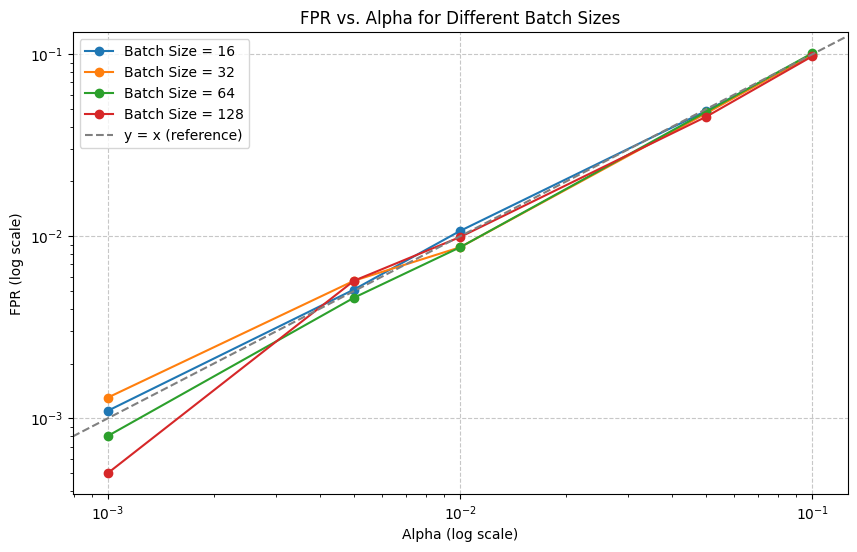

In [ ]:
plot_fpr_vs_alpha(fpr_sanity_check)

In [ ]:
fpr_multimodal_s0 = fpr_experiments(multimodal_data_s0, batch_sizes, M, alphas)
fpr_multimodal_s0

Batch Size: 16, Alpha: 0.1, FPR: 0.0967
Batch Size: 16, Alpha: 0.05, FPR: 0.0487
Batch Size: 16, Alpha: 0.01, FPR: 0.0105
Batch Size: 16, Alpha: 0.005, FPR: 0.0043
Batch Size: 16, Alpha: 0.001, FPR: 0.0009
Batch Size: 32, Alpha: 0.1, FPR: 0.0968
Batch Size: 32, Alpha: 0.05, FPR: 0.0484
Batch Size: 32, Alpha: 0.01, FPR: 0.0104
Batch Size: 32, Alpha: 0.005, FPR: 0.0052
Batch Size: 32, Alpha: 0.001, FPR: 0.0007
Batch Size: 64, Alpha: 0.1, FPR: 0.0971
Batch Size: 64, Alpha: 0.05, FPR: 0.0501
Batch Size: 64, Alpha: 0.01, FPR: 0.009
Batch Size: 64, Alpha: 0.005, FPR: 0.0052
Batch Size: 64, Alpha: 0.001, FPR: 0.0004
Batch Size: 128, Alpha: 0.1, FPR: 0.0961
Batch Size: 128, Alpha: 0.05, FPR: 0.0483
Batch Size: 128, Alpha: 0.01, FPR: 0.0104
Batch Size: 128, Alpha: 0.005, FPR: 0.005
Batch Size: 128, Alpha: 0.001, FPR: 0.0005


,batch_size,alpha,fpr
0,16,0.100,0.0967
1,16,0.050,0.0487
2,16,0.010,0.0105
3,16,0.005,0.0043
4,16,0.001,0.0009
5,32,0.100,0.0968
6,32,0.050,0.0484
7,32,0.010,0.0104
8,32,0.005,0.0052
9,32,0.001,0.0007


In [ ]:
fpr_multimodal_s1 = fpr_experiments(multimodal_data_s1, batch_sizes, M, alphas)
fpr_multimodal_s1

Batch Size: 16, Alpha: 0.1, FPR: 0.0935
Batch Size: 16, Alpha: 0.05, FPR: 0.0476
Batch Size: 16, Alpha: 0.01, FPR: 0.0105
Batch Size: 16, Alpha: 0.005, FPR: 0.0055
Batch Size: 16, Alpha: 0.001, FPR: 0.0007
Batch Size: 32, Alpha: 0.1, FPR: 0.103
Batch Size: 32, Alpha: 0.05, FPR: 0.0481
Batch Size: 32, Alpha: 0.01, FPR: 0.0088
Batch Size: 32, Alpha: 0.005, FPR: 0.0054
Batch Size: 32, Alpha: 0.001, FPR: 0.0011
Batch Size: 64, Alpha: 0.1, FPR: 0.1042
Batch Size: 64, Alpha: 0.05, FPR: 0.0472
Batch Size: 64, Alpha: 0.01, FPR: 0.0102
Batch Size: 64, Alpha: 0.005, FPR: 0.0037
Batch Size: 64, Alpha: 0.001, FPR: 0.0013
Batch Size: 128, Alpha: 0.1, FPR: 0.1017
Batch Size: 128, Alpha: 0.05, FPR: 0.0525
Batch Size: 128, Alpha: 0.01, FPR: 0.0088
Batch Size: 128, Alpha: 0.005, FPR: 0.0036
Batch Size: 128, Alpha: 0.001, FPR: 0.0005


,batch_size,alpha,fpr
0,16,0.100,0.0935
1,16,0.050,0.0476
2,16,0.010,0.0105
3,16,0.005,0.0055
4,16,0.001,0.0007
5,32,0.100,0.1030
6,32,0.050,0.0481
7,32,0.010,0.0088
8,32,0.005,0.0054
9,32,0.001,0.0011


In [ ]:
fpr_multimodal = compute_average_fpr(fpr_multimodal_s0, fpr_multimodal_s1)
fpr_multimodal

,batch_size,alpha,fpr
0,16,0.100,0.09510
1,16,0.050,0.04815
2,16,0.010,0.01050
3,16,0.005,0.00490
4,16,0.001,0.00080
5,32,0.100,0.09990
6,32,0.050,0.04825
7,32,0.010,0.00960
8,32,0.005,0.00530
9,32,0.001,0.00090


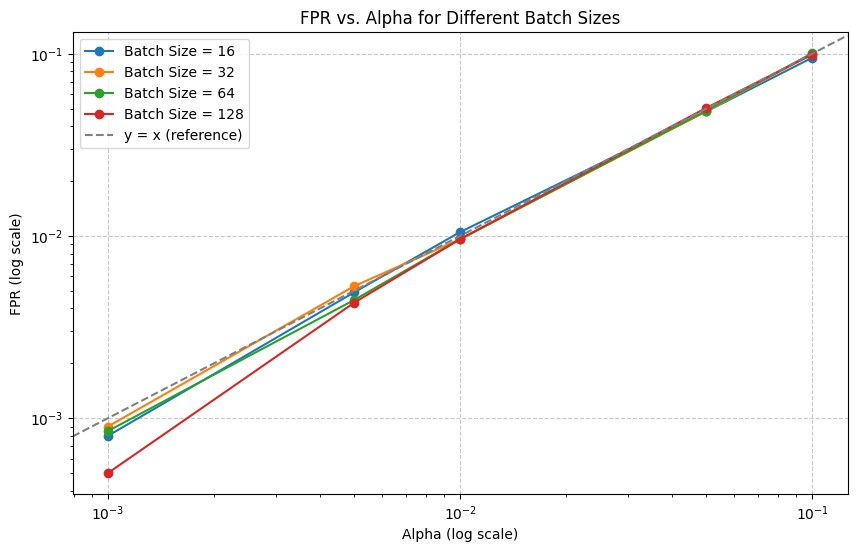

In [ ]:
plot_fpr_vs_alpha(fpr_multimodal)

Batch Size: 16, Alpha: 0.1, FPR: 0.0978
Batch Size: 16, Alpha: 0.05, FPR: 0.0464
Batch Size: 16, Alpha: 0.01, FPR: 0.0098
Batch Size: 16, Alpha: 0.005, FPR: 0.0043
Batch Size: 16, Alpha: 0.001, FPR: 0.0003
Batch Size: 32, Alpha: 0.1, FPR: 0.0959
Batch Size: 32, Alpha: 0.05, FPR: 0.0516
Batch Size: 32, Alpha: 0.01, FPR: 0.0101
Batch Size: 32, Alpha: 0.005, FPR: 0.0047
Batch Size: 32, Alpha: 0.001, FPR: 0.0006
Batch Size: 64, Alpha: 0.1, FPR: 0.0988
Batch Size: 64, Alpha: 0.05, FPR: 0.0499
Batch Size: 64, Alpha: 0.01, FPR: 0.0111
Batch Size: 64, Alpha: 0.005, FPR: 0.0047
Batch Size: 64, Alpha: 0.001, FPR: 0.0006
Batch Size: 128, Alpha: 0.1, FPR: 0.0998
Batch Size: 128, Alpha: 0.05, FPR: 0.0509
Batch Size: 128, Alpha: 0.01, FPR: 0.0093
Batch Size: 128, Alpha: 0.005, FPR: 0.005
Batch Size: 128, Alpha: 0.001, FPR: 0.0011
Batch Size: 16, Alpha: 0.1, FPR: 0.0952
Batch Size: 16, Alpha: 0.05, FPR: 0.0454
Batch Size: 16, Alpha: 0.01, FPR: 0.0084
Batch Size: 16, Alpha: 0.005, FPR: 0.0051
Batch Si

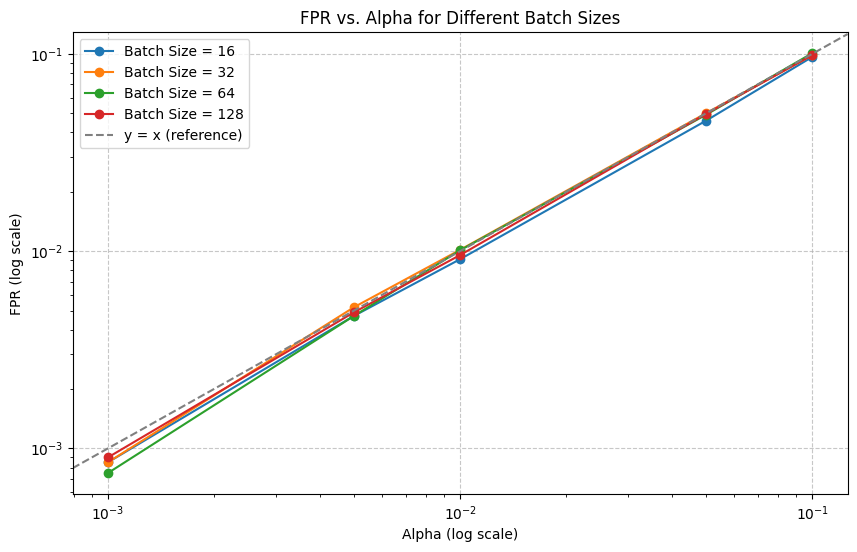

In [ ]:
fpr_up = get_averaged_fpr_df(up_s0, up_s1)
plot_fpr_vs_alpha(fpr_up)

In [ ]:
fpr_up

,batch_size,alpha,fpr
0,16,0.100,0.09650
1,16,0.050,0.04590
2,16,0.010,0.00910
3,16,0.005,0.00470
4,16,0.001,0.00085
5,32,0.100,0.09840
6,32,0.050,0.05010
7,32,0.010,0.01015
8,32,0.005,0.00520
9,32,0.001,0.00085


Batch Size: 16, Alpha: 0.1, FPR: 0.091
Batch Size: 16, Alpha: 0.05, FPR: 0.0462
Batch Size: 16, Alpha: 0.01, FPR: 0.0094
Batch Size: 16, Alpha: 0.005, FPR: 0.0043
Batch Size: 16, Alpha: 0.001, FPR: 0.0007
Batch Size: 32, Alpha: 0.1, FPR: 0.0944
Batch Size: 32, Alpha: 0.05, FPR: 0.0441
Batch Size: 32, Alpha: 0.01, FPR: 0.0096
Batch Size: 32, Alpha: 0.005, FPR: 0.0046
Batch Size: 32, Alpha: 0.001, FPR: 0.0009
Batch Size: 64, Alpha: 0.1, FPR: 0.1017
Batch Size: 64, Alpha: 0.05, FPR: 0.0487
Batch Size: 64, Alpha: 0.01, FPR: 0.009
Batch Size: 64, Alpha: 0.005, FPR: 0.0057
Batch Size: 64, Alpha: 0.001, FPR: 0.0005
Batch Size: 128, Alpha: 0.1, FPR: 0.1043
Batch Size: 128, Alpha: 0.05, FPR: 0.0482
Batch Size: 128, Alpha: 0.01, FPR: 0.009
Batch Size: 128, Alpha: 0.005, FPR: 0.0051
Batch Size: 128, Alpha: 0.001, FPR: 0.0006
Batch Size: 16, Alpha: 0.1, FPR: 0.0941
Batch Size: 16, Alpha: 0.05, FPR: 0.0454
Batch Size: 16, Alpha: 0.01, FPR: 0.0084
Batch Size: 16, Alpha: 0.005, FPR: 0.0041
Batch Size

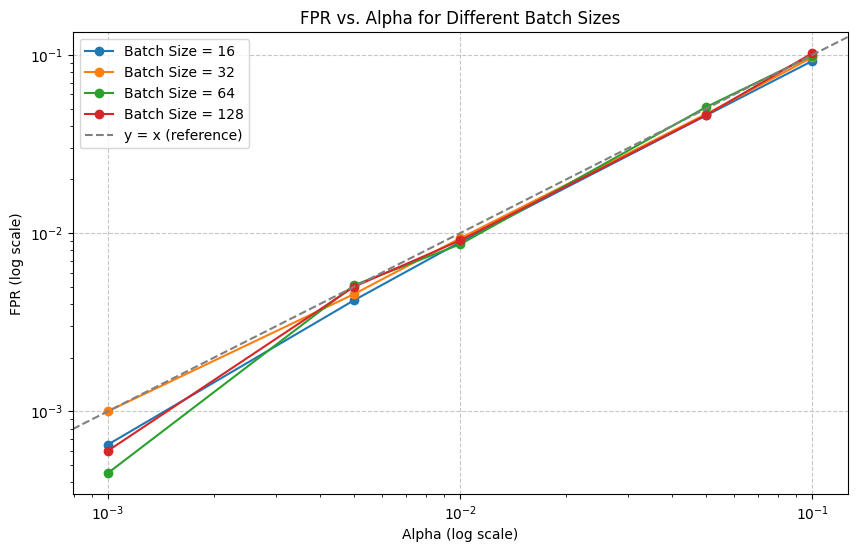

In [ ]:
fpr_down = get_averaged_fpr_df(down_s0, down_s1)
plot_fpr_vs_alpha(fpr_down)

In [ ]:
fpr_down

,batch_size,alpha,fpr
0,16,0.100,0.09255
1,16,0.050,0.04580
2,16,0.010,0.00890
3,16,0.005,0.00420
4,16,0.001,0.00065
5,32,0.100,0.09705
6,32,0.050,0.04665
7,32,0.010,0.00935
8,32,0.005,0.00455
9,32,0.001,0.00100


Batch Size: 16, Alpha: 0.1, FPR: 0.0965
Batch Size: 16, Alpha: 0.05, FPR: 0.0495
Batch Size: 16, Alpha: 0.01, FPR: 0.0089
Batch Size: 16, Alpha: 0.005, FPR: 0.0055
Batch Size: 16, Alpha: 0.001, FPR: 0.0013
Batch Size: 32, Alpha: 0.1, FPR: 0.0992
Batch Size: 32, Alpha: 0.05, FPR: 0.0475
Batch Size: 32, Alpha: 0.01, FPR: 0.01
Batch Size: 32, Alpha: 0.005, FPR: 0.0039
Batch Size: 32, Alpha: 0.001, FPR: 0.0011
Batch Size: 64, Alpha: 0.1, FPR: 0.1005
Batch Size: 64, Alpha: 0.05, FPR: 0.0475
Batch Size: 64, Alpha: 0.01, FPR: 0.0102
Batch Size: 64, Alpha: 0.005, FPR: 0.0044
Batch Size: 64, Alpha: 0.001, FPR: 0.0007
Batch Size: 128, Alpha: 0.1, FPR: 0.099
Batch Size: 128, Alpha: 0.05, FPR: 0.0504
Batch Size: 128, Alpha: 0.01, FPR: 0.0089
Batch Size: 128, Alpha: 0.005, FPR: 0.0044
Batch Size: 128, Alpha: 0.001, FPR: 0.0008
Batch Size: 16, Alpha: 0.1, FPR: 0.1059
Batch Size: 16, Alpha: 0.05, FPR: 0.0501
Batch Size: 16, Alpha: 0.01, FPR: 0.0112
Batch Size: 16, Alpha: 0.005, FPR: 0.0066
Batch Size

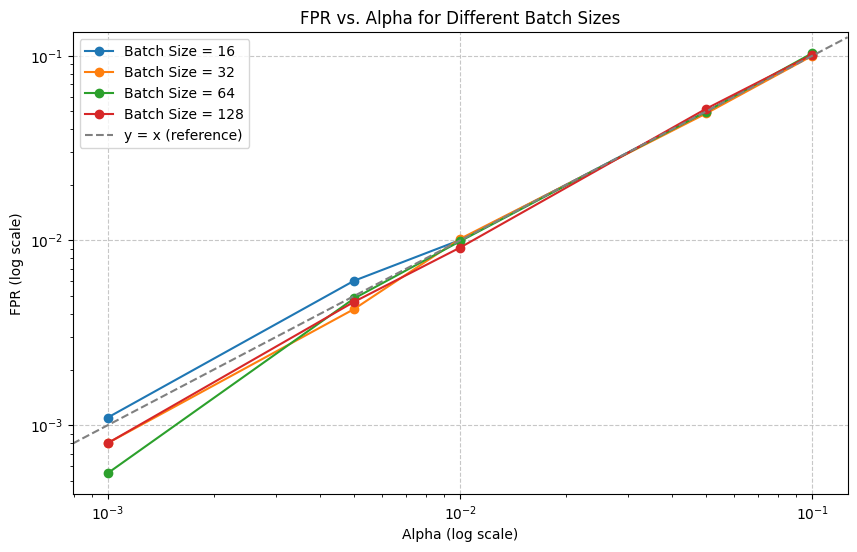

In [ ]:
fpr_lungomare = get_averaged_fpr_df(lungomare_s0, lungomare_s1)
plot_fpr_vs_alpha(fpr_lungomare)

In [ ]:
fpr_lungomare

,batch_size,alpha,fpr
0,16,0.100,0.10120
1,16,0.050,0.04980
2,16,0.010,0.01005
3,16,0.005,0.00605
4,16,0.001,0.00110
5,32,0.100,0.10000
6,32,0.050,0.04875
7,32,0.010,0.01020
8,32,0.005,0.00425
9,32,0.001,0.00080


Batch Size: 16, Alpha: 0.1, FPR: 0.1027
Batch Size: 16, Alpha: 0.05, FPR: 0.0517
Batch Size: 16, Alpha: 0.01, FPR: 0.0092
Batch Size: 16, Alpha: 0.005, FPR: 0.0044
Batch Size: 16, Alpha: 0.001, FPR: 0.0004
Batch Size: 32, Alpha: 0.1, FPR: 0.1013
Batch Size: 32, Alpha: 0.05, FPR: 0.0482
Batch Size: 32, Alpha: 0.01, FPR: 0.0092
Batch Size: 32, Alpha: 0.005, FPR: 0.0041
Batch Size: 32, Alpha: 0.001, FPR: 0.0007
Batch Size: 64, Alpha: 0.1, FPR: 0.1004
Batch Size: 64, Alpha: 0.05, FPR: 0.0489
Batch Size: 64, Alpha: 0.01, FPR: 0.0091
Batch Size: 64, Alpha: 0.005, FPR: 0.0052
Batch Size: 64, Alpha: 0.001, FPR: 0.0006
Batch Size: 128, Alpha: 0.1, FPR: 0.0963
Batch Size: 128, Alpha: 0.05, FPR: 0.0504
Batch Size: 128, Alpha: 0.01, FPR: 0.0093
Batch Size: 128, Alpha: 0.005, FPR: 0.0045
Batch Size: 128, Alpha: 0.001, FPR: 0.0012
Batch Size: 16, Alpha: 0.1, FPR: 0.0989
Batch Size: 16, Alpha: 0.05, FPR: 0.0531
Batch Size: 16, Alpha: 0.01, FPR: 0.0088
Batch Size: 16, Alpha: 0.005, FPR: 0.0045
Batch S

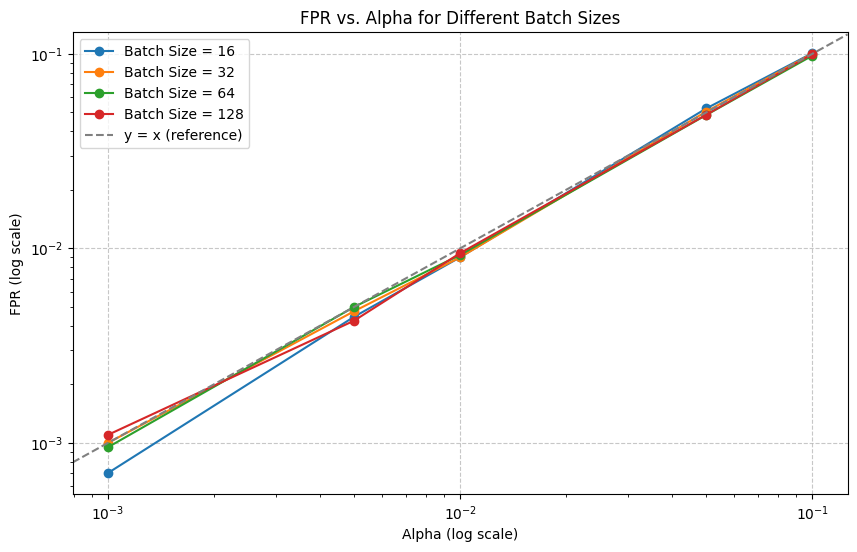

In [ ]:
fpr_francia = get_averaged_fpr_df(francia_s0, francia_s1)
plot_fpr_vs_alpha(fpr_francia)

In [ ]:
fpr_francia

,batch_size,alpha,fpr
0,16,0.100,0.10080
1,16,0.050,0.05240
2,16,0.010,0.00900
3,16,0.005,0.00445
4,16,0.001,0.00070
5,32,0.100,0.10020
6,32,0.050,0.05050
7,32,0.010,0.00900
8,32,0.005,0.00475
9,32,0.001,0.00100


---



# UNIFORM

In [ ]:
uniform_up_s0 = febagni_scripts.get_segment_data(data_case1_s0_uniform1, "Elicoidale Upstream")
uniform_up_s1 = febagni_scripts.get_segment_data(data_case1_s1_uniform1, "Elicoidale Upstream")

In [ ]:
uniform_down_s0 = febagni_scripts.get_segment_data(data_case1_s0_uniform1, "Elicoidale Downstream")
uniform_down_s1 = febagni_scripts.get_segment_data(data_case1_s1_uniform1, "Elicoidale Downstream")

In [ ]:
uniform_lungomare_s0 = febagni_scripts.get_segment_data(data_case1_s0_uniform1, "Lungomare Canepa")
uniform_lungomare_s1 = febagni_scripts.get_segment_data(data_case1_s1_uniform1, "Lungomare Canepa")

In [ ]:
uniform_francia_s0 = febagni_scripts.get_segment_data(data_case1_s0_uniform1, "Via di Francia")
uniform_francia_s1 = febagni_scripts.get_segment_data(data_case1_s1_uniform1, "Via di Francia")

In [ ]:
auc_uniform_up = auc_scores(uniform_up_s0, uniform_up_s1, batch_sizes, M)
auc_uniform_down = auc_scores(uniform_down_s0, uniform_down_s1, batch_sizes, M)
auc_uniform_lungomare = auc_scores(uniform_lungomare_s0, uniform_lungomare_s1, batch_sizes, M)
auc_uniform_francia = auc_scores(uniform_francia_s0, uniform_francia_s1, batch_sizes, M)
#
auc_uniform_total = auc_scores(data_case1_s0_uniform1, data_case1_s1_uniform1, batch_sizes, M)

Batch Size: 16, AUC: 0.53214612
Batch Size: 32, AUC: 0.5794026299999999
Batch Size: 64, AUC: 0.66020296
Batch Size: 128, AUC: 0.77170016
Batch Size: 16, AUC: 0.99926904
Batch Size: 32, AUC: 0.9999999199999999
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.99999994
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.9999922000000001
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.99983965
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


In [ ]:
df_uniform_auc = combine_aucs(auc_uniform_up, auc_uniform_down, auc_uniform_lungomare, auc_uniform_francia, auc_uniform_total)
df_uniform_auc

,batch_size,AUC,segment
0,16,0.532146,up
1,32,0.579403,up
2,64,0.660203,up
3,128,0.771700,up
4,16,0.999269,down
5,32,1.000000,down
6,64,1.000000,down
7,128,1.000000,down
8,16,1.000000,lungomare
9,32,1.000000,lungomare


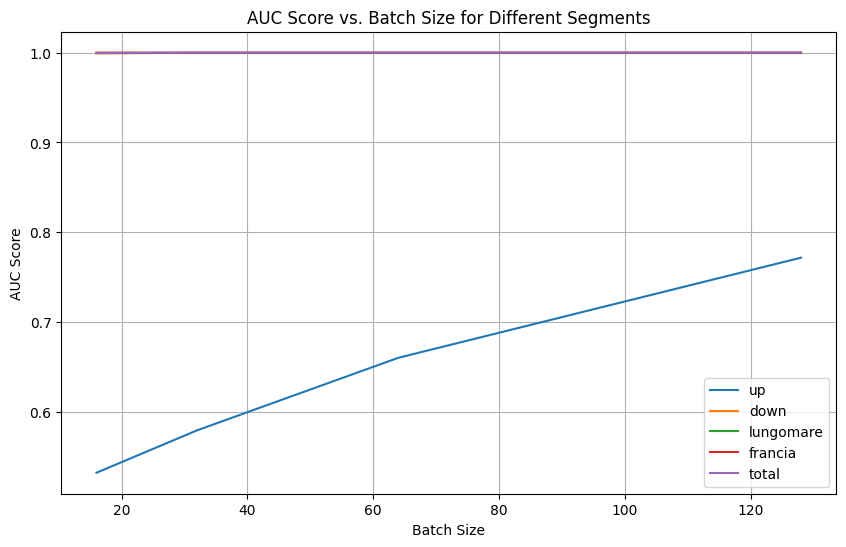

In [ ]:
plot_auc_vs_batch_size(df_uniform_auc)

Batch Size: 16, Alpha: 0.1, FPR: 0.1006
Batch Size: 16, Alpha: 0.05, FPR: 0.0479
Batch Size: 16, Alpha: 0.01, FPR: 0.0095
Batch Size: 16, Alpha: 0.005, FPR: 0.0052
Batch Size: 16, Alpha: 0.001, FPR: 0.0015
Batch Size: 32, Alpha: 0.1, FPR: 0.099
Batch Size: 32, Alpha: 0.05, FPR: 0.0502
Batch Size: 32, Alpha: 0.01, FPR: 0.0103
Batch Size: 32, Alpha: 0.005, FPR: 0.0054
Batch Size: 32, Alpha: 0.001, FPR: 0.0005
Batch Size: 64, Alpha: 0.1, FPR: 0.1014
Batch Size: 64, Alpha: 0.05, FPR: 0.0507
Batch Size: 64, Alpha: 0.01, FPR: 0.0102
Batch Size: 64, Alpha: 0.005, FPR: 0.006
Batch Size: 64, Alpha: 0.001, FPR: 0.0007
Batch Size: 128, Alpha: 0.1, FPR: 0.1028
Batch Size: 128, Alpha: 0.05, FPR: 0.052
Batch Size: 128, Alpha: 0.01, FPR: 0.0112
Batch Size: 128, Alpha: 0.005, FPR: 0.0048
Batch Size: 128, Alpha: 0.001, FPR: 0.0012
Batch Size: 16, Alpha: 0.1, FPR: 0.0999
Batch Size: 16, Alpha: 0.05, FPR: 0.0487
Batch Size: 16, Alpha: 0.01, FPR: 0.0093
Batch Size: 16, Alpha: 0.005, FPR: 0.0055
Batch Size

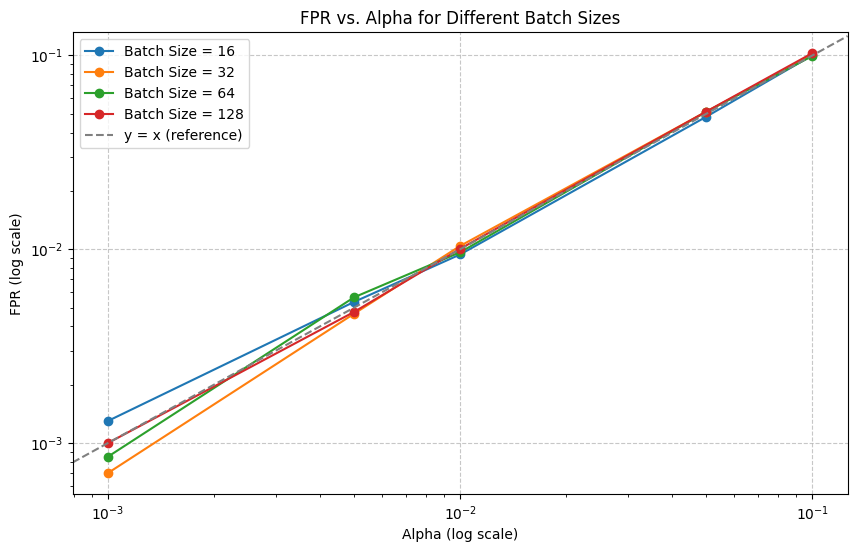

,batch_size,alpha,fpr
0,16,0.100,0.10025
1,16,0.050,0.04830
2,16,0.010,0.00940
3,16,0.005,0.00535
4,16,0.001,0.00130
5,32,0.100,0.10080
6,32,0.050,0.05130
7,32,0.010,0.01040
8,32,0.005,0.00465
9,32,0.001,0.00070


In [ ]:
fpr_uniform = get_averaged_fpr_df(data_case1_s0_uniform1, data_case1_s1_uniform1)
plot_fpr_vs_alpha(fpr_uniform)
fpr_uniform

Batch Size: 16, Alpha: 0.1, FPR: 0.0996
Batch Size: 16, Alpha: 0.05, FPR: 0.0486
Batch Size: 16, Alpha: 0.01, FPR: 0.0104
Batch Size: 16, Alpha: 0.005, FPR: 0.0043
Batch Size: 16, Alpha: 0.001, FPR: 0.0018
Batch Size: 32, Alpha: 0.1, FPR: 0.0971
Batch Size: 32, Alpha: 0.05, FPR: 0.0491
Batch Size: 32, Alpha: 0.01, FPR: 0.0101
Batch Size: 32, Alpha: 0.005, FPR: 0.005
Batch Size: 32, Alpha: 0.001, FPR: 0.0008
Batch Size: 64, Alpha: 0.1, FPR: 0.1048
Batch Size: 64, Alpha: 0.05, FPR: 0.0525
Batch Size: 64, Alpha: 0.01, FPR: 0.0075
Batch Size: 64, Alpha: 0.005, FPR: 0.0056
Batch Size: 64, Alpha: 0.001, FPR: 0.0012
Batch Size: 128, Alpha: 0.1, FPR: 0.1003
Batch Size: 128, Alpha: 0.05, FPR: 0.0515
Batch Size: 128, Alpha: 0.01, FPR: 0.0101
Batch Size: 128, Alpha: 0.005, FPR: 0.006
Batch Size: 128, Alpha: 0.001, FPR: 0.0007
Batch Size: 16, Alpha: 0.1, FPR: 0.1011
Batch Size: 16, Alpha: 0.05, FPR: 0.0512
Batch Size: 16, Alpha: 0.01, FPR: 0.0091
Batch Size: 16, Alpha: 0.005, FPR: 0.0056
Batch Siz

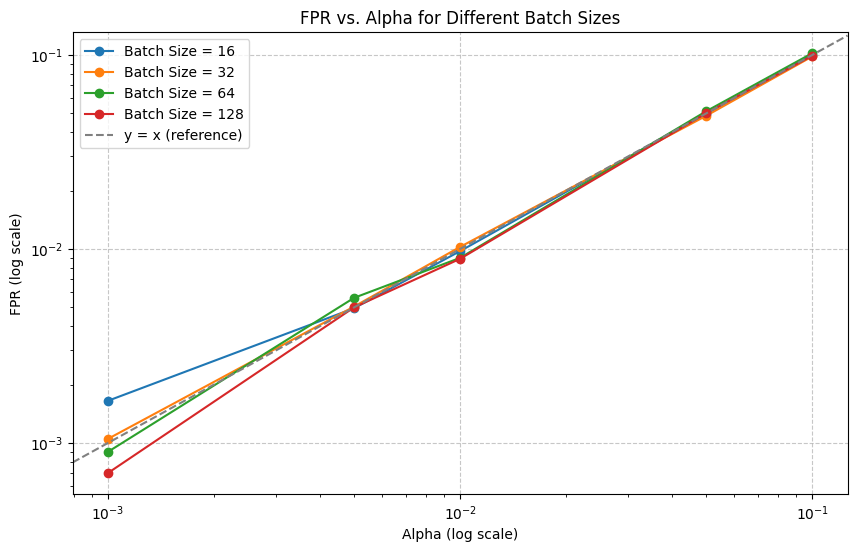

,batch_size,alpha,fpr
0,16,0.100,0.10035
1,16,0.050,0.04990
2,16,0.010,0.00975
3,16,0.005,0.00495
4,16,0.001,0.00165
5,32,0.100,0.09825
6,32,0.050,0.04860
7,32,0.010,0.01025
8,32,0.005,0.00505
9,32,0.001,0.00105


In [ ]:
fpr_uniform_up = get_averaged_fpr_df(uniform_up_s0, uniform_up_s0)
plot_fpr_vs_alpha(fpr_uniform_up)
fpr_uniform_up

Batch Size: 16, Alpha: 0.1, FPR: 0.1018
Batch Size: 16, Alpha: 0.05, FPR: 0.0504
Batch Size: 16, Alpha: 0.01, FPR: 0.0097
Batch Size: 16, Alpha: 0.005, FPR: 0.005
Batch Size: 16, Alpha: 0.001, FPR: 0.0008
Batch Size: 32, Alpha: 0.1, FPR: 0.0984
Batch Size: 32, Alpha: 0.05, FPR: 0.0502
Batch Size: 32, Alpha: 0.01, FPR: 0.0087
Batch Size: 32, Alpha: 0.005, FPR: 0.0054
Batch Size: 32, Alpha: 0.001, FPR: 0.0009
Batch Size: 64, Alpha: 0.1, FPR: 0.0978
Batch Size: 64, Alpha: 0.05, FPR: 0.0525
Batch Size: 64, Alpha: 0.01, FPR: 0.0098
Batch Size: 64, Alpha: 0.005, FPR: 0.0052
Batch Size: 64, Alpha: 0.001, FPR: 0.0009
Batch Size: 128, Alpha: 0.1, FPR: 0.104
Batch Size: 128, Alpha: 0.05, FPR: 0.0517
Batch Size: 128, Alpha: 0.01, FPR: 0.0107
Batch Size: 128, Alpha: 0.005, FPR: 0.0048
Batch Size: 128, Alpha: 0.001, FPR: 0.0013
Batch Size: 16, Alpha: 0.1, FPR: 0.1009
Batch Size: 16, Alpha: 0.05, FPR: 0.0544
Batch Size: 16, Alpha: 0.01, FPR: 0.0113
Batch Size: 16, Alpha: 0.005, FPR: 0.0049
Batch Siz

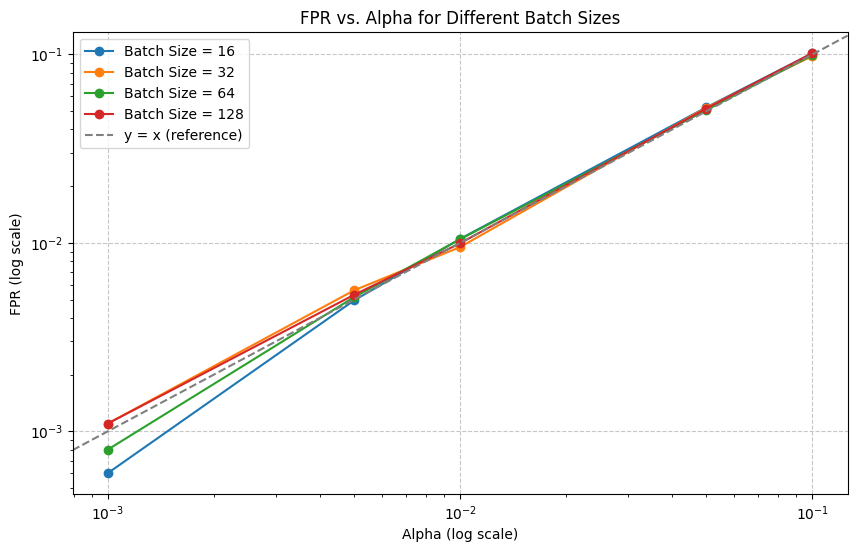

,batch_size,alpha,fpr
0,16,0.100,0.10135
1,16,0.050,0.05240
2,16,0.010,0.01050
3,16,0.005,0.00495
4,16,0.001,0.00060
5,32,0.100,0.09800
6,32,0.050,0.05220
7,32,0.010,0.00950
8,32,0.005,0.00560
9,32,0.001,0.00110


In [ ]:
fpr_uniform_down = get_averaged_fpr_df(uniform_down_s0, uniform_down_s1)
plot_fpr_vs_alpha(fpr_uniform_down)
fpr_uniform_down

Batch Size: 16, Alpha: 0.1, FPR: 0.1028
Batch Size: 16, Alpha: 0.05, FPR: 0.0509
Batch Size: 16, Alpha: 0.01, FPR: 0.01
Batch Size: 16, Alpha: 0.005, FPR: 0.0051
Batch Size: 16, Alpha: 0.001, FPR: 0.0009
Batch Size: 32, Alpha: 0.1, FPR: 0.1019
Batch Size: 32, Alpha: 0.05, FPR: 0.0488
Batch Size: 32, Alpha: 0.01, FPR: 0.0112
Batch Size: 32, Alpha: 0.005, FPR: 0.0052
Batch Size: 32, Alpha: 0.001, FPR: 0.0006
Batch Size: 64, Alpha: 0.1, FPR: 0.1044
Batch Size: 64, Alpha: 0.05, FPR: 0.0536
Batch Size: 64, Alpha: 0.01, FPR: 0.011
Batch Size: 64, Alpha: 0.005, FPR: 0.0051
Batch Size: 64, Alpha: 0.001, FPR: 0.0011
Batch Size: 128, Alpha: 0.1, FPR: 0.1001
Batch Size: 128, Alpha: 0.05, FPR: 0.0483
Batch Size: 128, Alpha: 0.01, FPR: 0.0105
Batch Size: 128, Alpha: 0.005, FPR: 0.0062
Batch Size: 128, Alpha: 0.001, FPR: 0.0008
Batch Size: 16, Alpha: 0.1, FPR: 0.1043
Batch Size: 16, Alpha: 0.05, FPR: 0.0476
Batch Size: 16, Alpha: 0.01, FPR: 0.0109
Batch Size: 16, Alpha: 0.005, FPR: 0.0058
Batch Size

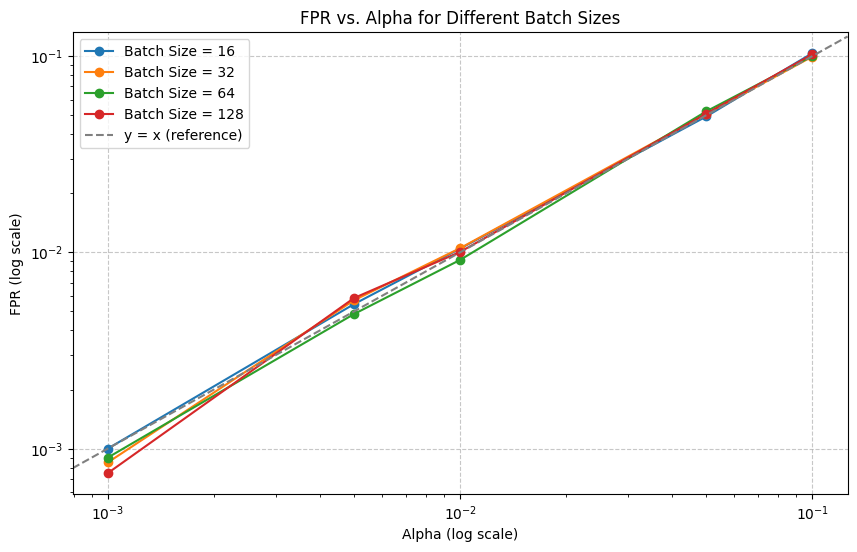

,batch_size,alpha,fpr
0,16,0.100,0.10355
1,16,0.050,0.04925
2,16,0.010,0.01045
3,16,0.005,0.00545
4,16,0.001,0.00100
5,32,0.100,0.09940
6,32,0.050,0.05075
7,32,0.010,0.01050
8,32,0.005,0.00570
9,32,0.001,0.00085


In [ ]:
fpr_uniform_lungomare = get_averaged_fpr_df(uniform_lungomare_s0, uniform_lungomare_s1)
plot_fpr_vs_alpha(fpr_uniform_lungomare)
fpr_uniform_lungomare

Batch Size: 16, Alpha: 0.1, FPR: 0.1001
Batch Size: 16, Alpha: 0.05, FPR: 0.048
Batch Size: 16, Alpha: 0.01, FPR: 0.0111
Batch Size: 16, Alpha: 0.005, FPR: 0.0052
Batch Size: 16, Alpha: 0.001, FPR: 0.0012
Batch Size: 32, Alpha: 0.1, FPR: 0.1023
Batch Size: 32, Alpha: 0.05, FPR: 0.0517
Batch Size: 32, Alpha: 0.01, FPR: 0.0111
Batch Size: 32, Alpha: 0.005, FPR: 0.0043
Batch Size: 32, Alpha: 0.001, FPR: 0.0011
Batch Size: 64, Alpha: 0.1, FPR: 0.0969
Batch Size: 64, Alpha: 0.05, FPR: 0.0494
Batch Size: 64, Alpha: 0.01, FPR: 0.0103
Batch Size: 64, Alpha: 0.005, FPR: 0.0053
Batch Size: 64, Alpha: 0.001, FPR: 0.0012
Batch Size: 128, Alpha: 0.1, FPR: 0.0975
Batch Size: 128, Alpha: 0.05, FPR: 0.0509
Batch Size: 128, Alpha: 0.01, FPR: 0.0076
Batch Size: 128, Alpha: 0.005, FPR: 0.0058
Batch Size: 128, Alpha: 0.001, FPR: 0.0013
Batch Size: 16, Alpha: 0.1, FPR: 0.1015
Batch Size: 16, Alpha: 0.05, FPR: 0.0502
Batch Size: 16, Alpha: 0.01, FPR: 0.0111
Batch Size: 16, Alpha: 0.005, FPR: 0.0058
Batch Si

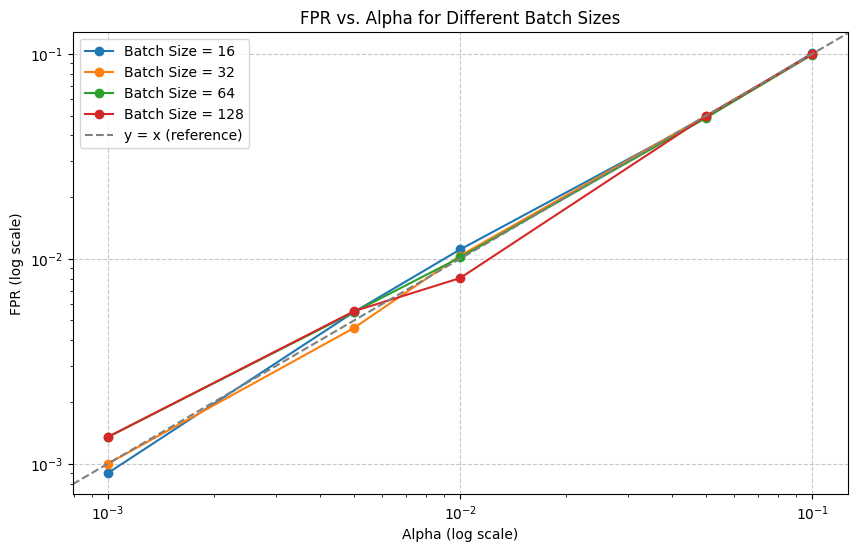

,batch_size,alpha,fpr
0,16,0.100,0.10080
1,16,0.050,0.04910
2,16,0.010,0.01110
3,16,0.005,0.00550
4,16,0.001,0.00090
5,32,0.100,0.09950
6,32,0.050,0.04990
7,32,0.010,0.01035
8,32,0.005,0.00460
9,32,0.001,0.00100


In [ ]:
fpr_uniform_francia = get_averaged_fpr_df(uniform_francia_s0, francia_s1)
plot_fpr_vs_alpha(fpr_uniform_francia)
fpr_uniform_francia

---

# GAUSSIAN


In [ ]:
gaussian_up_s0 = febagni_scripts.get_segment_data(data_case1_s0_gaussian, "Elicoidale Upstream")
gaussian_up_s1 = febagni_scripts.get_segment_data(data_case1_s1_gaussian, "Elicoidale Upstream")
gaussian_down_s0 = febagni_scripts.get_segment_data(data_case1_s0_gaussian, "Elicoidale Downstream")
gaussian_down_s1 = febagni_scripts.get_segment_data(data_case1_s1_gaussian, "Elicoidale Downstream")
gaussian_lungomare_s0 = febagni_scripts.get_segment_data(data_case1_s0_gaussian, "Lungomare Canepa")
gaussian_lungomare_s1 = febagni_scripts.get_segment_data(data_case1_s1_gaussian, "Lungomare Canepa")
gaussian_francia_s0 = febagni_scripts.get_segment_data(data_case1_s0_gaussian, "Via di Francia")
gaussian_francia_s1 = febagni_scripts.get_segment_data(data_case1_s1_gaussian, "Via di Francia")

In [ ]:
auc_gaussian_up = auc_scores(gaussian_up_s0, gaussian_up_s1, batch_sizes, M)
auc_gaussian_down = auc_scores(gaussian_down_s0, gaussian_down_s1, batch_sizes, M)
auc_gaussian_lungomare = auc_scores(gaussian_lungomare_s0, gaussian_lungomare_s1, batch_sizes, M)
auc_gaussian_francia = auc_scores(gaussian_francia_s0, gaussian_francia_s1, batch_sizes, M)
#
auc_gaussian_total = auc_scores(data_case1_s0_gaussian, data_case1_s1_gaussian, batch_sizes, M)

Batch Size: 16, AUC: 0.5375584
Batch Size: 32, AUC: 0.5840076000000001
Batch Size: 64, AUC: 0.65864484
Batch Size: 128, AUC: 0.76722464
Batch Size: 16, AUC: 0.99927308
Batch Size: 32, AUC: 0.9999999
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 1.0
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.9999801700000001
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.9998051800000001
Batch Size: 32, AUC: 1.0
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


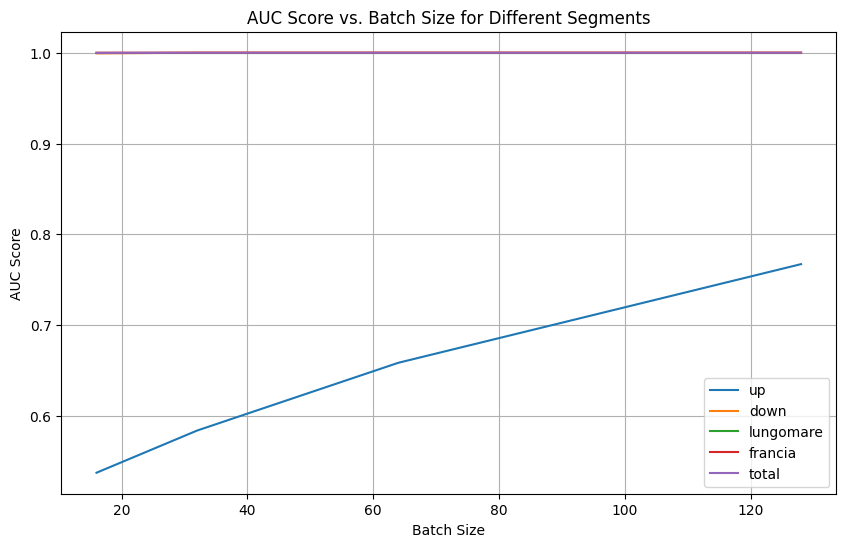

,batch_size,AUC,segment
0,16,0.537558,up
1,32,0.584008,up
2,64,0.658645,up
3,128,0.767225,up
4,16,0.999273,down
5,32,1.000000,down
6,64,1.000000,down
7,128,1.000000,down
8,16,1.000000,lungomare
9,32,1.000000,lungomare


In [ ]:
df_gaussian_auc = combine_aucs(auc_gaussian_up, auc_gaussian_down, auc_gaussian_lungomare, auc_gaussian_francia, auc_gaussian_total)
plot_auc_vs_batch_size(df_gaussian_auc)
df_gaussian_auc

Batch Size: 16, Alpha: 0.1, FPR: 0.0995
Batch Size: 16, Alpha: 0.05, FPR: 0.053
Batch Size: 16, Alpha: 0.01, FPR: 0.0084
Batch Size: 16, Alpha: 0.005, FPR: 0.0053
Batch Size: 16, Alpha: 0.001, FPR: 0.0011
Batch Size: 32, Alpha: 0.1, FPR: 0.094
Batch Size: 32, Alpha: 0.05, FPR: 0.0465
Batch Size: 32, Alpha: 0.01, FPR: 0.0101
Batch Size: 32, Alpha: 0.005, FPR: 0.0055
Batch Size: 32, Alpha: 0.001, FPR: 0.0008
Batch Size: 64, Alpha: 0.1, FPR: 0.1001
Batch Size: 64, Alpha: 0.05, FPR: 0.048
Batch Size: 64, Alpha: 0.01, FPR: 0.0092
Batch Size: 64, Alpha: 0.005, FPR: 0.0043
Batch Size: 64, Alpha: 0.001, FPR: 0.0008
Batch Size: 128, Alpha: 0.1, FPR: 0.0992
Batch Size: 128, Alpha: 0.05, FPR: 0.0502
Batch Size: 128, Alpha: 0.01, FPR: 0.0096
Batch Size: 128, Alpha: 0.005, FPR: 0.005
Batch Size: 128, Alpha: 0.001, FPR: 0.0014
Batch Size: 16, Alpha: 0.1, FPR: 0.1011
Batch Size: 16, Alpha: 0.05, FPR: 0.0512
Batch Size: 16, Alpha: 0.01, FPR: 0.0104
Batch Size: 16, Alpha: 0.005, FPR: 0.0058
Batch Size:

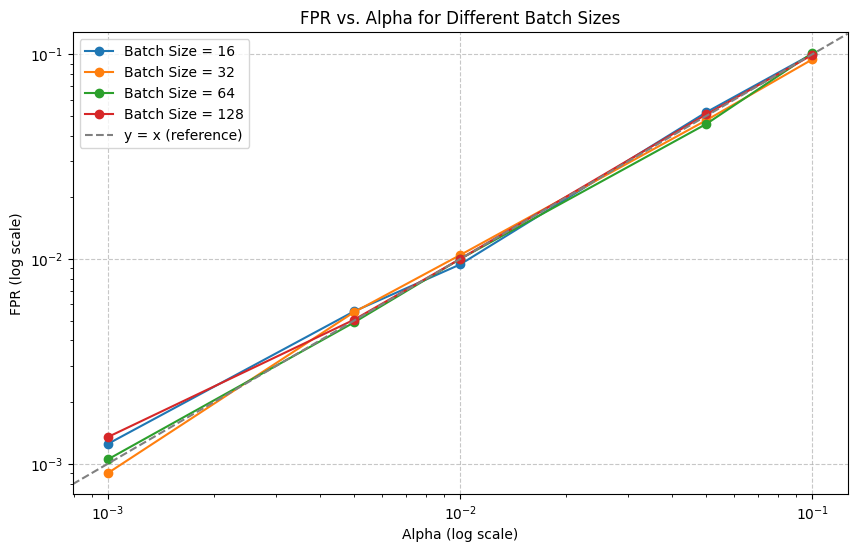

,batch_size,alpha,fpr
0,16,0.100,0.10030
1,16,0.050,0.05210
2,16,0.010,0.00940
3,16,0.005,0.00555
4,16,0.001,0.00125
5,32,0.100,0.09440
6,32,0.050,0.04760
7,32,0.010,0.01045
8,32,0.005,0.00550
9,32,0.001,0.00090


In [ ]:
fpr_gaussian = get_averaged_fpr_df(data_case1_s0_gaussian, data_case1_s1_gaussian)
plot_fpr_vs_alpha(fpr_gaussian)
fpr_gaussian

Batch Size: 16, Alpha: 0.1, FPR: 0.0986
Batch Size: 16, Alpha: 0.05, FPR: 0.0444
Batch Size: 16, Alpha: 0.01, FPR: 0.009
Batch Size: 16, Alpha: 0.005, FPR: 0.0056
Batch Size: 16, Alpha: 0.001, FPR: 0.0014
Batch Size: 32, Alpha: 0.1, FPR: 0.1019
Batch Size: 32, Alpha: 0.05, FPR: 0.0488
Batch Size: 32, Alpha: 0.01, FPR: 0.0098
Batch Size: 32, Alpha: 0.005, FPR: 0.005
Batch Size: 32, Alpha: 0.001, FPR: 0.0014
Batch Size: 64, Alpha: 0.1, FPR: 0.0986
Batch Size: 64, Alpha: 0.05, FPR: 0.0532
Batch Size: 64, Alpha: 0.01, FPR: 0.0095
Batch Size: 64, Alpha: 0.005, FPR: 0.0056
Batch Size: 64, Alpha: 0.001, FPR: 0.0012
Batch Size: 128, Alpha: 0.1, FPR: 0.0953
Batch Size: 128, Alpha: 0.05, FPR: 0.0485
Batch Size: 128, Alpha: 0.01, FPR: 0.0088
Batch Size: 128, Alpha: 0.005, FPR: 0.0056
Batch Size: 128, Alpha: 0.001, FPR: 0.0005
Batch Size: 16, Alpha: 0.1, FPR: 0.1028
Batch Size: 16, Alpha: 0.05, FPR: 0.0506
Batch Size: 16, Alpha: 0.01, FPR: 0.0093
Batch Size: 16, Alpha: 0.005, FPR: 0.0043
Batch Siz

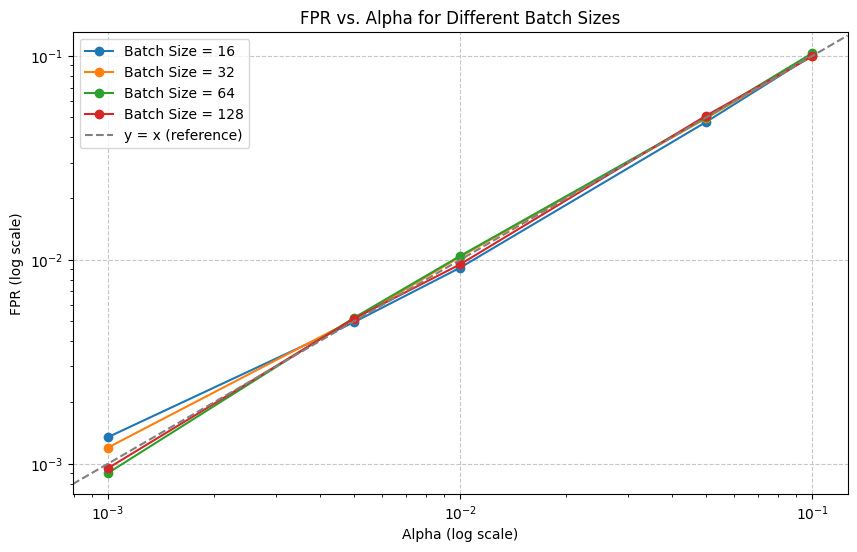

,batch_size,alpha,fpr
0,16,0.100,0.10070
1,16,0.050,0.04750
2,16,0.010,0.00915
3,16,0.005,0.00495
4,16,0.001,0.00135
5,32,0.100,0.10020
6,32,0.050,0.04950
7,32,0.010,0.01035
8,32,0.005,0.00510
9,32,0.001,0.00120


In [ ]:
fpr_gaussian_up = get_averaged_fpr_df(gaussian_up_s0, gaussian_up_s0)
plot_fpr_vs_alpha(fpr_gaussian_up)
fpr_gaussian_up

Batch Size: 16, Alpha: 0.1, FPR: 0.0992
Batch Size: 16, Alpha: 0.05, FPR: 0.0477
Batch Size: 16, Alpha: 0.01, FPR: 0.0089
Batch Size: 16, Alpha: 0.005, FPR: 0.0037
Batch Size: 16, Alpha: 0.001, FPR: 0.0015
Batch Size: 32, Alpha: 0.1, FPR: 0.1002
Batch Size: 32, Alpha: 0.05, FPR: 0.0494
Batch Size: 32, Alpha: 0.01, FPR: 0.0097
Batch Size: 32, Alpha: 0.005, FPR: 0.0046
Batch Size: 32, Alpha: 0.001, FPR: 0.0008
Batch Size: 64, Alpha: 0.1, FPR: 0.1045
Batch Size: 64, Alpha: 0.05, FPR: 0.0504
Batch Size: 64, Alpha: 0.01, FPR: 0.0096
Batch Size: 64, Alpha: 0.005, FPR: 0.0053
Batch Size: 64, Alpha: 0.001, FPR: 0.0008
Batch Size: 128, Alpha: 0.1, FPR: 0.1039
Batch Size: 128, Alpha: 0.05, FPR: 0.0496
Batch Size: 128, Alpha: 0.01, FPR: 0.0096
Batch Size: 128, Alpha: 0.005, FPR: 0.0048
Batch Size: 128, Alpha: 0.001, FPR: 0.0012
Batch Size: 16, Alpha: 0.1, FPR: 0.0962
Batch Size: 16, Alpha: 0.05, FPR: 0.0518
Batch Size: 16, Alpha: 0.01, FPR: 0.0108
Batch Size: 16, Alpha: 0.005, FPR: 0.006
Batch Si

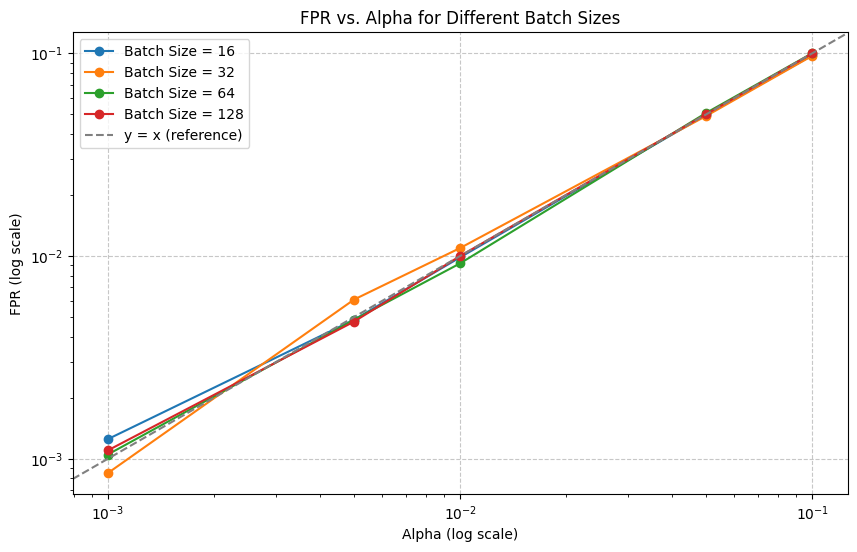

,batch_size,alpha,fpr
0,16,0.100,0.09770
1,16,0.050,0.04975
2,16,0.010,0.00985
3,16,0.005,0.00485
4,16,0.001,0.00125
5,32,0.100,0.09720
6,32,0.050,0.04910
7,32,0.010,0.01095
8,32,0.005,0.00610
9,32,0.001,0.00085


In [ ]:
fpr_gaussian_down = get_averaged_fpr_df(gaussian_down_s0, gaussian_down_s1)
plot_fpr_vs_alpha(fpr_gaussian_down)
fpr_gaussian_down

Batch Size: 16, Alpha: 0.1, FPR: 0.1007
Batch Size: 16, Alpha: 0.05, FPR: 0.0528
Batch Size: 16, Alpha: 0.01, FPR: 0.0098
Batch Size: 16, Alpha: 0.005, FPR: 0.0053
Batch Size: 16, Alpha: 0.001, FPR: 0.0014
Batch Size: 32, Alpha: 0.1, FPR: 0.1036
Batch Size: 32, Alpha: 0.05, FPR: 0.0495
Batch Size: 32, Alpha: 0.01, FPR: 0.0099
Batch Size: 32, Alpha: 0.005, FPR: 0.0051
Batch Size: 32, Alpha: 0.001, FPR: 0.001
Batch Size: 64, Alpha: 0.1, FPR: 0.101
Batch Size: 64, Alpha: 0.05, FPR: 0.0477
Batch Size: 64, Alpha: 0.01, FPR: 0.0087
Batch Size: 64, Alpha: 0.005, FPR: 0.0058
Batch Size: 64, Alpha: 0.001, FPR: 0.0009
Batch Size: 128, Alpha: 0.1, FPR: 0.1064
Batch Size: 128, Alpha: 0.05, FPR: 0.0501
Batch Size: 128, Alpha: 0.01, FPR: 0.013
Batch Size: 128, Alpha: 0.005, FPR: 0.005
Batch Size: 128, Alpha: 0.001, FPR: 0.001
Batch Size: 16, Alpha: 0.1, FPR: 0.097
Batch Size: 16, Alpha: 0.05, FPR: 0.052
Batch Size: 16, Alpha: 0.01, FPR: 0.0107
Batch Size: 16, Alpha: 0.005, FPR: 0.0057
Batch Size: 16

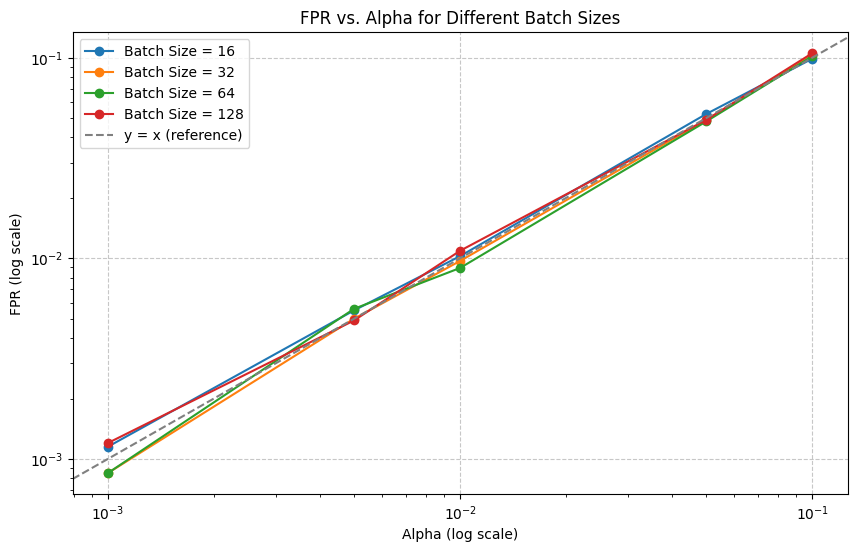

,batch_size,alpha,fpr
0,16,0.100,0.09885
1,16,0.050,0.05240
2,16,0.010,0.01025
3,16,0.005,0.00550
4,16,0.001,0.00115
5,32,0.100,0.10360
6,32,0.050,0.04885
7,32,0.010,0.00970
8,32,0.005,0.00500
9,32,0.001,0.00085


In [ ]:
fpr_gaussian_lungomare = get_averaged_fpr_df(gaussian_lungomare_s0, gaussian_lungomare_s1)
plot_fpr_vs_alpha(fpr_gaussian_lungomare)
fpr_gaussian_lungomare

Batch Size: 16, Alpha: 0.1, FPR: 0.0962
Batch Size: 16, Alpha: 0.05, FPR: 0.0521
Batch Size: 16, Alpha: 0.01, FPR: 0.0091
Batch Size: 16, Alpha: 0.005, FPR: 0.0052
Batch Size: 16, Alpha: 0.001, FPR: 0.001
Batch Size: 32, Alpha: 0.1, FPR: 0.1027
Batch Size: 32, Alpha: 0.05, FPR: 0.0512
Batch Size: 32, Alpha: 0.01, FPR: 0.009
Batch Size: 32, Alpha: 0.005, FPR: 0.0048
Batch Size: 32, Alpha: 0.001, FPR: 0.0004
Batch Size: 64, Alpha: 0.1, FPR: 0.1002
Batch Size: 64, Alpha: 0.05, FPR: 0.0535
Batch Size: 64, Alpha: 0.01, FPR: 0.0086
Batch Size: 64, Alpha: 0.005, FPR: 0.0049
Batch Size: 64, Alpha: 0.001, FPR: 0.0007
Batch Size: 128, Alpha: 0.1, FPR: 0.1032
Batch Size: 128, Alpha: 0.05, FPR: 0.051
Batch Size: 128, Alpha: 0.01, FPR: 0.0106
Batch Size: 128, Alpha: 0.005, FPR: 0.0059
Batch Size: 128, Alpha: 0.001, FPR: 0.0009
Batch Size: 16, Alpha: 0.1, FPR: 0.1001
Batch Size: 16, Alpha: 0.05, FPR: 0.0501
Batch Size: 16, Alpha: 0.01, FPR: 0.0106
Batch Size: 16, Alpha: 0.005, FPR: 0.0039
Batch Size

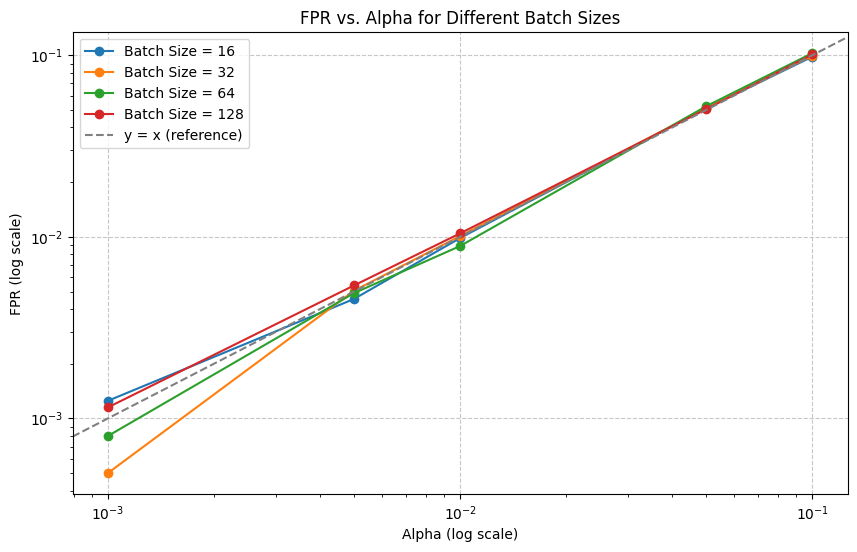

,batch_size,alpha,fpr
0,16,0.100,0.09815
1,16,0.050,0.05110
2,16,0.010,0.00985
3,16,0.005,0.00455
4,16,0.001,0.00125
5,32,0.100,0.09955
6,32,0.050,0.05120
7,32,0.010,0.01010
8,32,0.005,0.00505
9,32,0.001,0.00050


In [ ]:
fpr_gaussian_francia = get_averaged_fpr_df(gaussian_francia_s0, francia_s1)
plot_fpr_vs_alpha(fpr_gaussian_francia)
fpr_gaussian_francia

---


# MULTIMODAL 50-50

In [15]:
multimodal_data_s0_50 = febagni_scripts.create_multimodal_dataset(data_case1_s0_uniform1, data_case1_s0_uniform2, ratio=0.5)
multimodal_data_s0_50.shape

(21, 14400)

In [16]:
multimodal_data_s1_50 = febagni_scripts.create_multimodal_dataset(data_case1_s1_uniform1, data_case1_s1_uniform2, ratio=0.5)
multimodal_data_s1_50.shape

(21, 14400)

In [17]:
multimodal_50_up_s0 = febagni_scripts.get_segment_data(multimodal_data_s0_50, "Elicoidale Upstream")
multimodal_50_up_s1 = febagni_scripts.get_segment_data(multimodal_data_s1_50, "Elicoidale Upstream")
multimodal_50_down_s0 = febagni_scripts.get_segment_data(multimodal_data_s0_50, "Elicoidale Downstream")
multimodal_50_down_s1 = febagni_scripts.get_segment_data(multimodal_data_s1_50, "Elicoidale Downstream")
multimodal_50_lungomare_s0 = febagni_scripts.get_segment_data(multimodal_data_s0_50, "Lungomare Canepa")
multimodal_50_lungomare_s1 = febagni_scripts.get_segment_data(multimodal_data_s1_50, "Lungomare Canepa")
multimodal_50_francia_s0 = febagni_scripts.get_segment_data(multimodal_data_s0_50, "Via di Francia")
multimodal_50_francia_s1 = febagni_scripts.get_segment_data(multimodal_data_s1_50, "Via di Francia")

In [20]:
auc_multimodal_50_up = auc_scores(multimodal_50_up_s0, multimodal_50_up_s1, batch_sizes, M)
auc_multimodal_50_down = auc_scores(multimodal_50_down_s0, multimodal_50_down_s1, batch_sizes, M)
auc_multimodal_50_lungomare = auc_scores(multimodal_50_lungomare_s0, multimodal_50_lungomare_s1, batch_sizes, M)
auc_multimodal_50_francia = auc_scores(multimodal_50_francia_s0, multimodal_50_francia_s1, batch_sizes, M)
#
auc_multimodal_50_total = auc_scores(multimodal_data_s0_50, multimodal_data_s1_50, batch_sizes, M)

Batch Size: 16, AUC: 0.5122373499999999
Batch Size: 32, AUC: 0.53250033
Batch Size: 64, AUC: 0.56595762
Batch Size: 128, AUC: 0.62229281
Batch Size: 16, AUC: 0.8966650700000001
Batch Size: 32, AUC: 0.98681899
Batch Size: 64, AUC: 0.9998800200000001
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.9850690099999999
Batch Size: 32, AUC: 0.99991766
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.9814929600000001
Batch Size: 32, AUC: 0.9996295600000001
Batch Size: 64, AUC: 0.99999998
Batch Size: 128, AUC: 1.0
Batch Size: 16, AUC: 0.82543699
Batch Size: 32, AUC: 0.99774225
Batch Size: 64, AUC: 1.0
Batch Size: 128, AUC: 1.0


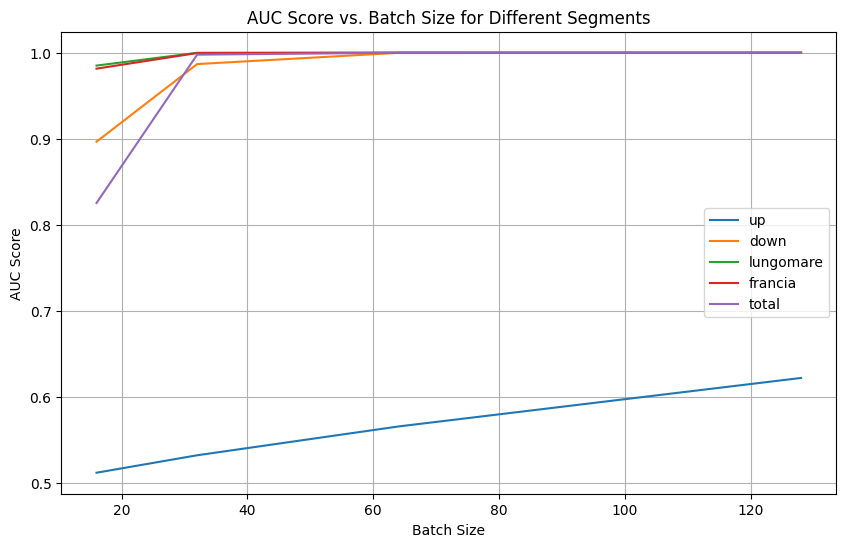

,batch_size,AUC,segment
0,16,0.512237,up
1,32,0.532500,up
2,64,0.565958,up
3,128,0.622293,up
4,16,0.896665,down
5,32,0.986819,down
6,64,0.999880,down
7,128,1.000000,down
8,16,0.985069,lungomare
9,32,0.999918,lungomare


In [21]:
df_multimodal_50_auc = combine_aucs(auc_multimodal_50_up, auc_multimodal_50_down, auc_multimodal_50_lungomare, auc_multimodal_50_francia, auc_multimodal_50_total)
plot_auc_vs_batch_size(df_multimodal_50_auc)
df_multimodal_50_auc

Batch Size: 16, Alpha: 0.1, FPR: 0.0903
Batch Size: 16, Alpha: 0.05, FPR: 0.0453
Batch Size: 16, Alpha: 0.01, FPR: 0.007
Batch Size: 16, Alpha: 0.005, FPR: 0.0046
Batch Size: 16, Alpha: 0.001, FPR: 0.0007
Batch Size: 32, Alpha: 0.1, FPR: 0.1006
Batch Size: 32, Alpha: 0.05, FPR: 0.0441
Batch Size: 32, Alpha: 0.01, FPR: 0.0089
Batch Size: 32, Alpha: 0.005, FPR: 0.0038
Batch Size: 32, Alpha: 0.001, FPR: 0.001
Batch Size: 64, Alpha: 0.1, FPR: 0.1025
Batch Size: 64, Alpha: 0.05, FPR: 0.0493
Batch Size: 64, Alpha: 0.01, FPR: 0.0096
Batch Size: 64, Alpha: 0.005, FPR: 0.0053
Batch Size: 64, Alpha: 0.001, FPR: 0.0007
Batch Size: 128, Alpha: 0.1, FPR: 0.0994
Batch Size: 128, Alpha: 0.05, FPR: 0.0485
Batch Size: 128, Alpha: 0.01, FPR: 0.0108
Batch Size: 128, Alpha: 0.005, FPR: 0.005
Batch Size: 128, Alpha: 0.001, FPR: 0.0012
Batch Size: 16, Alpha: 0.1, FPR: 0.0934
Batch Size: 16, Alpha: 0.05, FPR: 0.0441
Batch Size: 16, Alpha: 0.01, FPR: 0.0087
Batch Size: 16, Alpha: 0.005, FPR: 0.0054
Batch Size

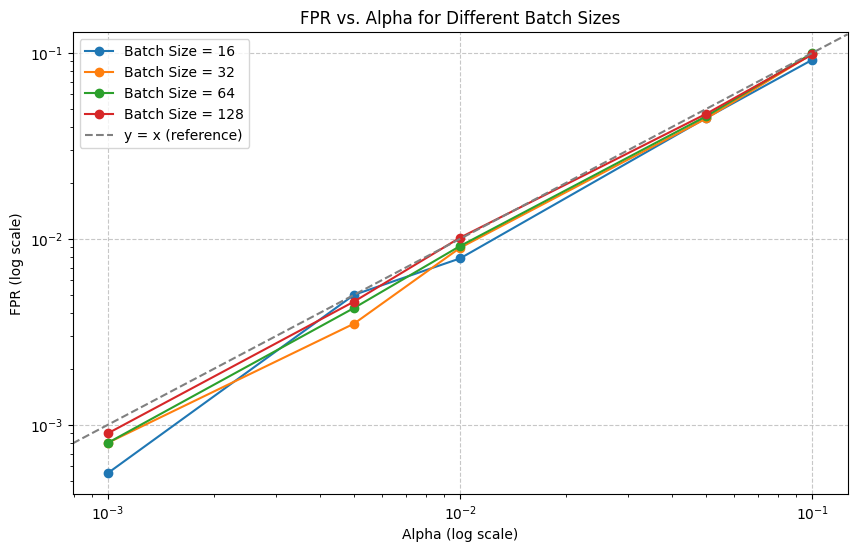

,batch_size,alpha,fpr
0,16,0.100,0.09185
1,16,0.050,0.04470
2,16,0.010,0.00785
3,16,0.005,0.00500
4,16,0.001,0.00055
5,32,0.100,0.09880
6,32,0.050,0.04440
7,32,0.010,0.00895
8,32,0.005,0.00350
9,32,0.001,0.00080


In [22]:
fpr_multimodal_50 = get_averaged_fpr_df(multimodal_data_s0_50, multimodal_data_s1_50)
plot_fpr_vs_alpha(fpr_multimodal_50)
fpr_multimodal_50

Batch Size: 16, Alpha: 0.1, FPR: 0.093
Batch Size: 16, Alpha: 0.05, FPR: 0.0463
Batch Size: 16, Alpha: 0.01, FPR: 0.0088
Batch Size: 16, Alpha: 0.005, FPR: 0.0038
Batch Size: 16, Alpha: 0.001, FPR: 0.0009
Batch Size: 32, Alpha: 0.1, FPR: 0.0973
Batch Size: 32, Alpha: 0.05, FPR: 0.0509
Batch Size: 32, Alpha: 0.01, FPR: 0.0081
Batch Size: 32, Alpha: 0.005, FPR: 0.0043
Batch Size: 32, Alpha: 0.001, FPR: 0.0004
Batch Size: 64, Alpha: 0.1, FPR: 0.1062
Batch Size: 64, Alpha: 0.05, FPR: 0.0477
Batch Size: 64, Alpha: 0.01, FPR: 0.0095
Batch Size: 64, Alpha: 0.005, FPR: 0.0046
Batch Size: 64, Alpha: 0.001, FPR: 0.0012
Batch Size: 128, Alpha: 0.1, FPR: 0.0991
Batch Size: 128, Alpha: 0.05, FPR: 0.0468
Batch Size: 128, Alpha: 0.01, FPR: 0.0106
Batch Size: 128, Alpha: 0.005, FPR: 0.0046
Batch Size: 128, Alpha: 0.001, FPR: 0.0011
Batch Size: 16, Alpha: 0.1, FPR: 0.0963
Batch Size: 16, Alpha: 0.05, FPR: 0.0442
Batch Size: 16, Alpha: 0.01, FPR: 0.0099
Batch Size: 16, Alpha: 0.005, FPR: 0.005
Batch Siz

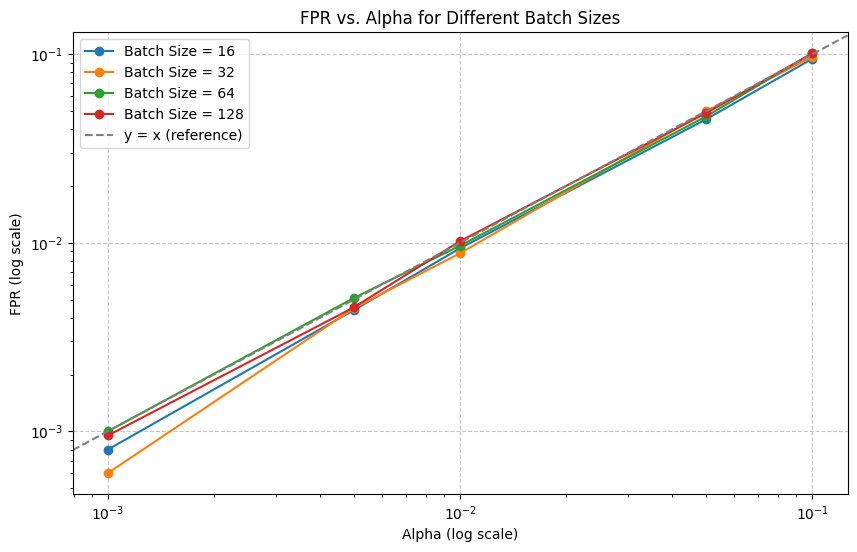

,batch_size,alpha,fpr
0,16,0.100,0.09465
1,16,0.050,0.04525
2,16,0.010,0.00935
3,16,0.005,0.00440
4,16,0.001,0.00080
5,32,0.100,0.09695
6,32,0.050,0.04985
7,32,0.010,0.00880
8,32,0.005,0.00450
9,32,0.001,0.00060


In [23]:
fpr_multimodal_50_up = get_averaged_fpr_df(multimodal_50_up_s0, multimodal_50_up_s0)
plot_fpr_vs_alpha(fpr_multimodal_50_up)
fpr_multimodal_50_up

Batch Size: 16, Alpha: 0.1, FPR: 0.0992
Batch Size: 16, Alpha: 0.05, FPR: 0.0492
Batch Size: 16, Alpha: 0.01, FPR: 0.0095
Batch Size: 16, Alpha: 0.005, FPR: 0.0033
Batch Size: 16, Alpha: 0.001, FPR: 0.0009
Batch Size: 32, Alpha: 0.1, FPR: 0.0963
Batch Size: 32, Alpha: 0.05, FPR: 0.0479
Batch Size: 32, Alpha: 0.01, FPR: 0.0089
Batch Size: 32, Alpha: 0.005, FPR: 0.0043
Batch Size: 32, Alpha: 0.001, FPR: 0.0011
Batch Size: 64, Alpha: 0.1, FPR: 0.096
Batch Size: 64, Alpha: 0.05, FPR: 0.05
Batch Size: 64, Alpha: 0.01, FPR: 0.0108
Batch Size: 64, Alpha: 0.005, FPR: 0.004
Batch Size: 64, Alpha: 0.001, FPR: 0.0009
Batch Size: 128, Alpha: 0.1, FPR: 0.0983
Batch Size: 128, Alpha: 0.05, FPR: 0.052
Batch Size: 128, Alpha: 0.01, FPR: 0.0079
Batch Size: 128, Alpha: 0.005, FPR: 0.0043
Batch Size: 128, Alpha: 0.001, FPR: 0.0006
Batch Size: 16, Alpha: 0.1, FPR: 0.0995
Batch Size: 16, Alpha: 0.05, FPR: 0.0467
Batch Size: 16, Alpha: 0.01, FPR: 0.01
Batch Size: 16, Alpha: 0.005, FPR: 0.0039
Batch Size: 16

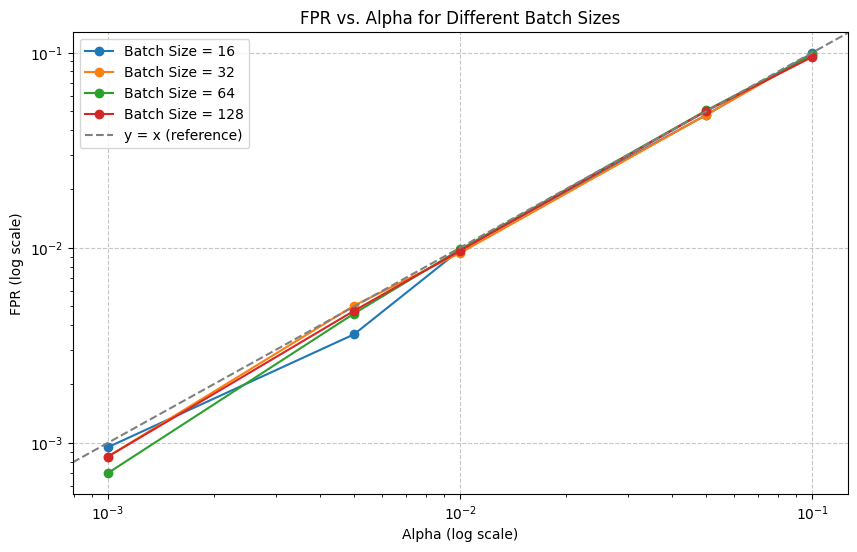

,batch_size,alpha,fpr
0,16,0.100,0.09935
1,16,0.050,0.04795
2,16,0.010,0.00975
3,16,0.005,0.00360
4,16,0.001,0.00095
5,32,0.100,0.09770
6,32,0.050,0.04795
7,32,0.010,0.00940
8,32,0.005,0.00505
9,32,0.001,0.00085


In [24]:
fpr_multimodal_50_down = get_averaged_fpr_df(multimodal_50_down_s0, multimodal_50_down_s1)
plot_fpr_vs_alpha(fpr_multimodal_50_down)
fpr_multimodal_50_down

Batch Size: 16, Alpha: 0.1, FPR: 0.0904
Batch Size: 16, Alpha: 0.05, FPR: 0.0474
Batch Size: 16, Alpha: 0.01, FPR: 0.0083
Batch Size: 16, Alpha: 0.005, FPR: 0.0042
Batch Size: 16, Alpha: 0.001, FPR: 0.0008
Batch Size: 32, Alpha: 0.1, FPR: 0.0945
Batch Size: 32, Alpha: 0.05, FPR: 0.0494
Batch Size: 32, Alpha: 0.01, FPR: 0.0095
Batch Size: 32, Alpha: 0.005, FPR: 0.0034
Batch Size: 32, Alpha: 0.001, FPR: 0.0011
Batch Size: 64, Alpha: 0.1, FPR: 0.0974
Batch Size: 64, Alpha: 0.05, FPR: 0.0502
Batch Size: 64, Alpha: 0.01, FPR: 0.0113
Batch Size: 64, Alpha: 0.005, FPR: 0.0057
Batch Size: 64, Alpha: 0.001, FPR: 0.0008
Batch Size: 128, Alpha: 0.1, FPR: 0.0959
Batch Size: 128, Alpha: 0.05, FPR: 0.0462
Batch Size: 128, Alpha: 0.01, FPR: 0.0101
Batch Size: 128, Alpha: 0.005, FPR: 0.0035
Batch Size: 128, Alpha: 0.001, FPR: 0.0009
Batch Size: 16, Alpha: 0.1, FPR: 0.096
Batch Size: 16, Alpha: 0.05, FPR: 0.0452
Batch Size: 16, Alpha: 0.01, FPR: 0.0081
Batch Size: 16, Alpha: 0.005, FPR: 0.0049
Batch Si

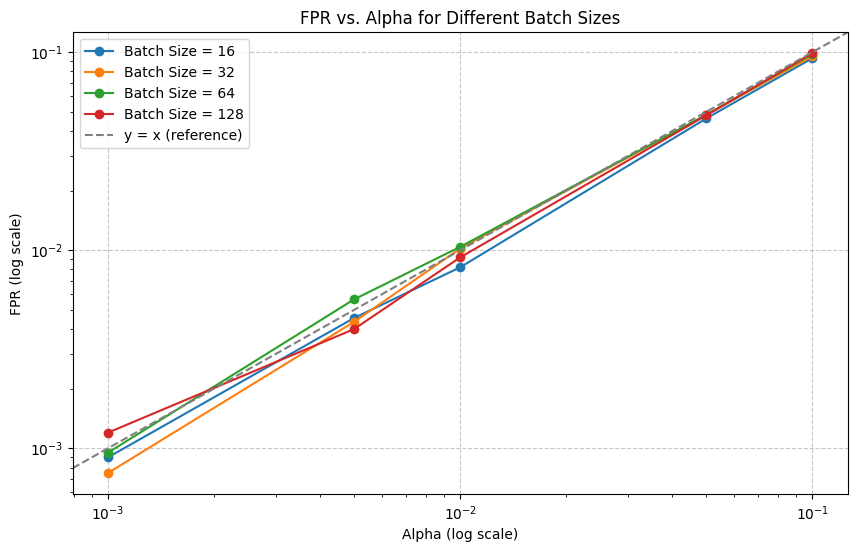

,batch_size,alpha,fpr
0,16,0.100,0.09320
1,16,0.050,0.04630
2,16,0.010,0.00820
3,16,0.005,0.00455
4,16,0.001,0.00090
5,32,0.100,0.09540
6,32,0.050,0.04830
7,32,0.010,0.01020
8,32,0.005,0.00435
9,32,0.001,0.00075


In [25]:
fpr_multimodal_50_lungomare = get_averaged_fpr_df(multimodal_50_lungomare_s0, multimodal_50_lungomare_s1)
plot_fpr_vs_alpha(fpr_multimodal_50_lungomare)
fpr_multimodal_50_lungomare

Batch Size: 16, Alpha: 0.1, FPR: 0.0951
Batch Size: 16, Alpha: 0.05, FPR: 0.044
Batch Size: 16, Alpha: 0.01, FPR: 0.0084
Batch Size: 16, Alpha: 0.005, FPR: 0.005
Batch Size: 16, Alpha: 0.001, FPR: 0.0015
Batch Size: 32, Alpha: 0.1, FPR: 0.1001
Batch Size: 32, Alpha: 0.05, FPR: 0.053
Batch Size: 32, Alpha: 0.01, FPR: 0.0123
Batch Size: 32, Alpha: 0.005, FPR: 0.0058
Batch Size: 32, Alpha: 0.001, FPR: 0.0014
Batch Size: 64, Alpha: 0.1, FPR: 0.1049
Batch Size: 64, Alpha: 0.05, FPR: 0.0532
Batch Size: 64, Alpha: 0.01, FPR: 0.0093
Batch Size: 64, Alpha: 0.005, FPR: 0.0054
Batch Size: 64, Alpha: 0.001, FPR: 0.0009
Batch Size: 128, Alpha: 0.1, FPR: 0.105
Batch Size: 128, Alpha: 0.05, FPR: 0.05
Batch Size: 128, Alpha: 0.01, FPR: 0.0087
Batch Size: 128, Alpha: 0.005, FPR: 0.0051
Batch Size: 128, Alpha: 0.001, FPR: 0.001
Batch Size: 16, Alpha: 0.1, FPR: 0.0966
Batch Size: 16, Alpha: 0.05, FPR: 0.0518
Batch Size: 16, Alpha: 0.01, FPR: 0.0098
Batch Size: 16, Alpha: 0.005, FPR: 0.0051
Batch Size: 16

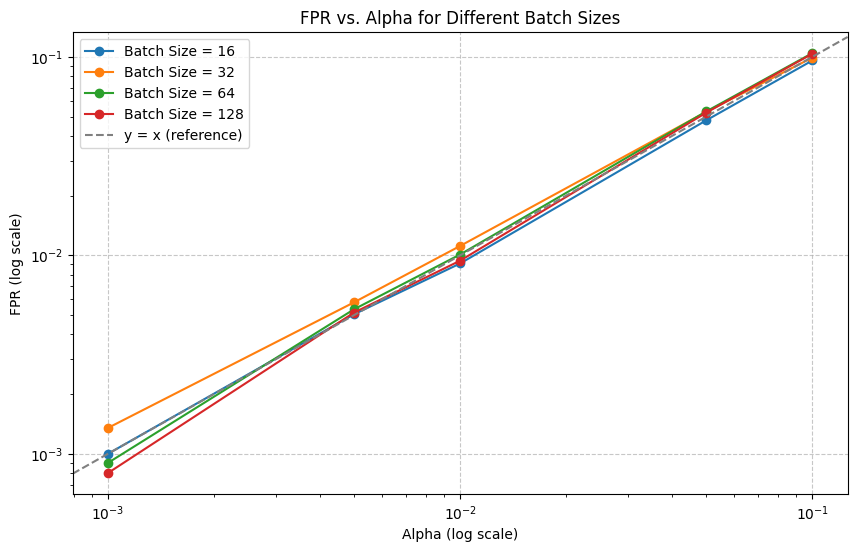

,batch_size,alpha,fpr
0,16,0.100,0.09585
1,16,0.050,0.04790
2,16,0.010,0.00910
3,16,0.005,0.00505
4,16,0.001,0.00100
5,32,0.100,0.09910
6,32,0.050,0.05285
7,32,0.010,0.01115
8,32,0.005,0.00580
9,32,0.001,0.00135


In [27]:
fpr_multimodal_50_francia = get_averaged_fpr_df(multimodal_50_francia_s0, multimodal_50_francia_s1)
plot_fpr_vs_alpha(fpr_multimodal_50_francia)
fpr_multimodal_50_francia